In [2]:
# 引入相關套件與函式庫
import pymysql
import yfinance as yf
import math
from math import sqrt
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from pyhht.visualization import plot_imfs
from sklearn.metrics import r2_score
from datetime import datetime,timedelta
from pyhht.emd import EMD
from matplotlib import pyplot
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from matplotlib import gridspec
import pywt
from pywt import wavedec
import time

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
train_begin_date = '2005-01-01'
train_end_date = '2020-12-25'
predict_begin_date = '2021-01-01'
predict_end_date = '2023-01-01'

In [5]:
train_dataframe_Close = yf.download('^TWII',start=train_begin_date,end=train_end_date)
train_dataframe_Close = train_dataframe_Close['Close']
train_dataframe_Close = pd.DataFrame(train_dataframe_Close)
train_dataframe_Close

[*********************100%***********************]  1 of 1 completed


Close
Date                    
2005-01-03   6143.120117
2005-01-04   6060.459961
2005-01-05   5988.370117
2005-01-06   5982.120117
2005-01-07   5935.990234
2005-01-10   5942.850098
2005-01-11   5975.660156
2005-01-12   5879.080078
2005-01-13   5853.939941
2005-01-14   5889.520020
2005-01-17   5945.270020
2005-01-18   5933.569824
2005-01-19   5895.350098
2005-01-20   5888.100098
2005-01-21   5848.910156
2005-01-24   5771.479980
2005-01-25   5782.750000
2005-01-26   5835.370117
2005-01-27   5842.759766
2005-01-28   5879.930176
2005-01-31   5994.229980
2005-02-01   5981.540039
2005-02-02   6018.689941
2005-02-03   6034.600098
2005-02-14   6112.399902
2005-02-15   6122.390137
2005-02-16   6143.490234
2005-02-17   6072.160156
2005-02-18   6115.430176
2005-02-21   6142.779785
2005-02-22   6107.169922
2005-02-23   6121.520020
2005-02-24   6128.339844
2005-02-25   6207.830078
2005-03-01   6259.689941
2005-03-02   6225.250000
2005-03-03   6202.379883
2005-03-04   6193.620117
2005-03-07   6220.520020
2005-03-08   6173.339844
2005-03-09   6213.279785
2005-03-10   6192.529785
2005-03-11   6204.229980
2005-03-14   6155.509766
2005-03-15   6063.479980
2005-03-16   6072.359863
2005-03-17   6032.470215
2005-03-18   6043.950195
2005-03-21   6058.959961
2005-03-22   6018.790039
2005-03-23   6019.490234
2005-03-24   6001.000000
2005-03-25   6065.910156
2005-03-28   6048.740234
2005-03-29   5961.240234
2005-03-30   5957.979980
2005-03-31   6005.879883
2005-04-01   6028.750000
2005-04-04   6019.930176
2005-04-06   6013.490234
2005-04-07   5971.759766
2005-04-08   6024.069824
2005-04-11   5979.419922
2005-04-12   5993.890137
2005-04-13   5998.080078
2005-04-14   5976.680176
2005-04-15   5888.370117
2005-04-18   5715.160156
2005-04-19   5748.350098
2005-04-20   5693.009766
2005-04-21   5721.990234
2005-04-22   5747.089844
2005-04-25   5758.310059
2005-04-26   5805.250000
2005-04-27   5778.270020
2005-04-28   5842.270020
2005-04-29   5818.069824
2005-05-03   5818.220215
2005-05-04   5803.680176
2005-05-05   5927.500000
2005-05-06   5967.959961
2005-05-09   5966.850098
2005-05-10   5949.799805
2005-05-11   5917.129883
2005-05-12   5934.600098
2005-05-13   5981.479980
2005-05-16   5925.879883
2005-05-17   5894.009766
2005-05-18   5890.830078
2005-05-19   5970.709961
2005-05-20   5954.689941
2005-05-23   5885.450195
2005-05-24   5909.100098
2005-05-25   5888.529785
2005-05-26   5939.419922
2005-05-27   5991.549805
2005-05-30   6009.520020
2005-05-31   6011.560059
2005-06-01   5971.620117
2005-06-02   6039.479980
2005-06-03   6107.950195
2005-06-06   6137.569824
2005-06-07   6105.790039
2005-06-08   6161.660156
2005-06-09   6145.919922
2005-06-10   6192.350098
2005-06-13   6231.049805
2005-06-14   6205.759766
2005-06-15   6252.100098
2005-06-16   6282.410156
2005-06-17   6293.560059
2005-06-20   6296.890137
2005-06-21   6278.459961
2005-06-22   6357.830078
2005-06-23   6373.859863
2005-06-24   6340.689941
2005-06-27   6302.990234
2005-06-28   6316.839844
2005-06-29   6231.649902
2005-06-30   6241.939941
2005-07-01   6272.140137
2005-07-04   6271.200195
2005-07-05   6232.040039
2005-07-06   6222.049805
2005-07-07   6212.600098
2005-07-08   6201.399902
2005-07-11   6298.859863
2005-07-12   6358.810059
2005-07-13   6377.089844
2005-07-14   6418.350098
2005-07-15   6410.589844
2005-07-19   6416.339844
2005-07-20   6423.810059
2005-07-21   6394.029785
2005-07-22   6380.729980
2005-07-25   6420.450195
2005-07-26   6366.160156
2005-07-27   6327.250000
2005-07-28   6375.640137
2005-07-29   6311.979980
2005-08-01   6307.930176
2005-08-02   6343.540039
2005-08-03   6455.569824
2005-08-04   6446.009766
2005-08-08   6380.029785
2005-08-09   6380.000000
2005-08-10   6356.839844
2005-08-11   6353.709961
2005-08-12   6350.899902
2005-08-15   6245.129883
2005-08-16   6242.399902
2005-08-17   6241.919922
2005-08-18   6205.089844
2005-08-19   6158.939941
2005-08-22   6206.649902
2005-08-23   6195.180176
2005-08-24   6127.240234
2005-08-25   6109.660156
2005-08-26   6136.5

In [6]:
train_dataframe_Close['Close'].tolist()

[6143.1201171875,
 6060.4599609375,
 5988.3701171875,
 5982.1201171875,
 5935.990234375,
 5942.85009765625,
 5975.66015625,
 5879.080078125,
 5853.93994140625,
 5889.52001953125,
 5945.27001953125,
 5933.56982421875,
 5895.35009765625,
 5888.10009765625,
 5848.91015625,
 5771.47998046875,
 5782.75,
 5835.3701171875,
 5842.759765625,
 5879.93017578125,
 5994.22998046875,
 5981.5400390625,
 6018.68994140625,
 6034.60009765625,
 6112.39990234375,
 6122.39013671875,
 6143.490234375,
 6072.16015625,
 6115.43017578125,
 6142.77978515625,
 6107.169921875,
 6121.52001953125,
 6128.33984375,
 6207.830078125,
 6259.68994140625,
 6225.25,
 6202.3798828125,
 6193.6201171875,
 6220.52001953125,
 6173.33984375,
 6213.27978515625,
 6192.52978515625,
 6204.22998046875,
 6155.509765625,
 6063.47998046875,
 6072.35986328125,
 6032.47021484375,
 6043.9501953125,
 6058.9599609375,
 6018.7900390625,
 6019.490234375,
 6001.0,
 6065.91015625,
 6048.740234375,
 5961.240234375,
 5957.97998046875,
 6005.8798828

In [7]:
test_dataframe_Close = yf.download('^TWII',start=predict_begin_date,end=predict_end_date)
test_dataframe_Close = test_dataframe_Close['Close']
test_dataframe_Close = pd.DataFrame(test_dataframe_Close)
test_dataframe_Close

[*********************100%***********************]  1 of 1 completed


Close
Date                    
2021-01-04  14902.030273
2021-01-05  15000.030273
2021-01-06  14983.129883
2021-01-07  15214.000000
2021-01-08  15463.950195
2021-01-11  15557.299805
2021-01-12  15500.700195
2021-01-13  15769.980469
2021-01-14  15707.190430
2021-01-15  15616.389648
2021-01-18  15612.000000
2021-01-19  15877.370117
2021-01-20  15806.179688
2021-01-21  16153.769531
2021-01-22  16019.030273
2021-01-25  15946.540039
2021-01-26  15658.849609
2021-01-27  15701.450195
2021-01-28  15415.879883
2021-01-29  15138.309570
2021-02-01  15410.089844
2021-02-02  15760.049805
2021-02-03  15771.320312
2021-02-04  15706.219727
2021-02-05  15802.400391
2021-02-17  16362.290039
2021-02-18  16424.509766
2021-02-19  16341.379883
2021-02-22  16410.160156
2021-02-23  16443.400391
2021-02-24  16212.530273
2021-02-25  16452.179688
2021-02-26  15953.799805
2021-03-02  15946.879883
2021-03-03  16211.730469
2021-03-04  15906.410156
2021-03-05  15855.230469
2021-03-08  15820.110352
2021-03-09  15853.089844
2021-03-10  15911.669922
2021-03-11  16179.559570
2021-03-12  16255.179688
2021-03-15  16249.330078
2021-03-16  16313.160156
2021-03-17  16215.820312
2021-03-18  16287.839844
2021-03-19  16070.240234
2021-03-22  16189.219727
2021-03-23  16177.589844
2021-03-24  16032.120117
2021-03-25  16060.139648
2021-03-26  16305.879883
2021-03-29  16475.970703
2021-03-30  16554.900391
2021-03-31  16431.130859
2021-04-01  16571.279297
2021-04-07  16815.359375
2021-04-08  16926.439453
2021-04-09  16854.099609
2021-04-12  16859.699219
2021-04-13  16824.910156
2021-04-14  16865.970703
2021-04-15  17076.730469
2021-04-16  17158.810547
2021-04-19  17263.279297
2021-04-20  17323.869141
2021-04-21  17202.109375
2021-04-22  17096.970703
2021-04-23  17300.269531
2021-04-26  17572.289062
2021-04-27  17595.900391
2021-04-28  17567.529297
2021-04-29  17566.660156
2021-05-03  17222.349609
2021-05-04  16933.779297
2021-05-05  16843.439453
2021-05-06  16994.359375
2021-05-07  17285.000000
2021-05-10  17235.609375
2021-05-11  16583.130859
2021-05-12  15902.370117
2021-05-13  15670.099609
2021-05-14  15827.089844
2021-05-17  15353.889648
2021-05-18  16145.980469
2021-05-19  16132.660156
2021-05-20  16042.360352
2021-05-21  16302.059570
2021-05-24  16338.290039
2021-05-25  16595.669922
2021-05-26  16643.689453
2021-05-27  16601.609375
2021-05-28  16870.859375
2021-05-31  17068.429688
2021-06-01  17162.380859
2021-06-02  17165.039062
2021-06-03  17246.160156
2021-06-04  17147.410156
2021-06-07  17083.910156
2021-06-08  17076.210938
2021-06-09  16966.220703
2021-06-10  17159.220703
2021-06-11  17213.519531
2021-06-15  17371.289062
2021-06-16  17307.859375
2021-06-17  17390.609375
2021-06-18  17318.539062
2021-06-21  17062.980469
2021-06-22  17075.550781
2021-06-23  17336.710938
2021-06-24  17407.960938
2021-06-25  17502.990234
2021-06-28  17590.970703
2021-06-29  17598.189453
2021-06-30  17755.460938
2021-07-01  17713.939453
2021-07-02  17710.150391
2021-07-05  17919.330078
2021-07-06  17913.070312
2021-07-07  17850.689453
2021-07-08  17866.089844
2021-07-09  17661.480469
2021-07-12  17814.330078
2021-07-13  17847.519531
2021-07-14  17845.750000
2021-07-15  18034.189453
2021-07-16  17895.250000
2021-07-19  17789.250000
2021-07-20  17528.740234
2021-07-21  17458.789062
2021-07-22  17572.330078
2021-07-23  17572.919922
2021-07-26  17403.560547
2021-07-27  17269.869141
2021-07-28  17135.220703
2021-07-29  17402.810547
2021-07-30  17247.410156
2021-08-02  17503.279297
2021-08-03  17553.759766
2021-08-04  17623.890625
2021-08-05  17603.119141
2021-08-06  17526.279297
2021-08-09  17485.150391
2021-08-10  17323.640625
2021-08-11  17227.179688
2021-08-12  17219.939453
2021-08-13  16982.109375
2021-08-16  16858.769531
2021-08-17  16661.359375
2021-08-18  16826.269531
2021-08-19  16375.400391
2021-08-20  16341.940430
2021-08-23  16741.839844
2021-08-24  16818.730469
2021-08-25  17045.859375
2021-08-26  17066.960938
2021-08-27  17209.929688
2021-08-30  17396.519531
2021-08-31  17490.2

In [8]:
wavelet='Haar'

# 將已蒐集的訓練集資料先進行分解

In [9]:
# 訓練集的小波轉換
train = train_dataframe_Close['Close']
train_coefficients = pywt.wavedec(train, wavelet, level = 2)
len(train_coefficients)

3

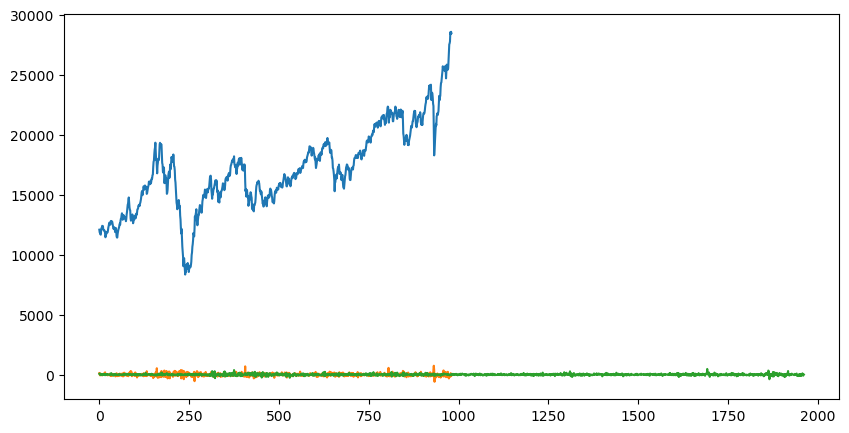

In [10]:
plt.figure(figsize=(10,5))
plt.plot(train_coefficients[0])
plt.plot(train_coefficients[1])
plt.plot(train_coefficients[2])

In [11]:
# 測試集的小波轉換
test = test_dataframe_Close['Close']
test_coefficients = pywt.wavedec(test, wavelet, level =2)
len(test_coefficients)

3

In [53]:
# 把訓練集分解的 coefficient 匯到資料庫 
def Coefficient_to_Database(coefficient, coefficient_number): 
    coefficient_df = pd.DataFrame(coefficient)
    coefficient_df = coefficient_df.reset_index()
    print(coefficient_df)
    connection = pymysql.connect(host = '' ,  user = '' ,  passwd = "", db='')
    cursor = connection.cursor()
    data = coefficient_df.values.tolist()
    insert_query = '''
    REPLACE INTO coefficient{} (`sn`,`coefficient{}`)
    VALUES (%s, %s)
    '''.format(coefficient_number,coefficient_number)
    cursor.executemany(insert_query, data)
    connection.commit()
    connection.close()

In [37]:
Coefficient_to_Database(train_coefficients[0], 1)
Coefficient_to_Database(train_coefficients[1], 2)
Coefficient_to_Database(train_coefficients[2], 3)

     index             0
0        0  12087.035156
1        1  11866.790283
2        2  11811.149902
3        3  11701.920166
4        4  11670.405029
5        5  12014.530029
6        6  12225.220215
7        7  12243.449951
8        8  12410.554932
9        9  12394.929932
10      10  12382.774658
11      11  12106.130127
12      12  12049.120117
13      13  12016.935303
14      14  12034.025146
15      15  11984.569824
16      16  11789.145264
17      17  11455.219971
18      18  11592.050049
19      19  11683.735107
20      20  11900.869873
21      21  11867.984863
22      22  11850.840088
23      23  11864.299805
24      24  12016.090088
25      25  12256.485107
26      26  12387.539795
27      27  12562.480225
28      28  12675.419922
29      29  12546.709961
30      30  12498.715088
31      31  12535.834961
32      32  12811.184814
33      33  12809.510010
34      34  12690.515137
35      35  12776.524902
36      36  12735.289795
37      37  12540.174805
38      38  12382.929932


# 預訓練模型

In [38]:
def createSlidingWindow(dataset,windowSize):
    x_train = []
    y_train = []
    for i in range(len(dataset)-windowSize):
        x_train.append(dataset[i:i+windowSize])
        y_train.append(dataset[i+windowSize])
    return np.array(x_train), np.array(y_train)

In [39]:
batch_size = 60
epochs = 100

In [40]:
def LSTM_model(x, y,timestep,i,batch_size,epochs):
    
    scaler = MinMaxScaler(feature_range=(0,1))
    
    y_temp = np.concatenate([np.array(x[-timestep:]).flatten(), np.array(y).flatten()], axis=0)
    train_scaled_data = scaler.fit_transform(x.reshape(-1,1))
    test_scaled_data = scaler.fit_transform(y_temp.reshape(-1,1))
    
    x_train,y_train = createSlidingWindow(train_scaled_data,timestep)
    x_test,y_test = createSlidingWindow(test_scaled_data,timestep)
    print(len(y_test))
    print(len(x_test))
    model=Sequential()
    model.add(LSTM(32, return_sequences=False, input_shape=(timestep,x_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['accuracy'],run_eagerly=True)
    model.summary()
    history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs)
    print(x_test)
    test_predict = model.predict(x_test)
    predict_Close = scaler.inverse_transform(test_predict)
    y_test_true = scaler.inverse_transform(y_test)
    LSTM_R2 = r2_score(y_test_true,predict_Close)
    LSTM_MSE = mean_squared_error(y_test_true,predict_Close)
    LSTM_MAE = mean_absolute_error(y_test_true,predict_Close)
    print("LSTM_R2=",LSTM_R2)
    print("LSTM_MSE=",LSTM_MSE)
    print("LSTM_MAE=",LSTM_MAE)
    print("LSTM_RMSE=",sqrt(LSTM_MSE))
    plt.figure(figsize=(10 ,5))
    plt.title("sliding_window_size:{}".format(timestep))
    plt.plot(y_test_true)
    plt.plot(predict_Close,c='g')
    plt.legend(['data', 'LSTM_prediction'], loc='upper right')
    plt.show()

    loss = history.history['loss']
    plt.plot(loss, label='loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    
    simple_LSTM_modal_save_path = './model/DWT_simple-LSTM-model-result-{}-{}.h5'.format(i,timestep)
    model.save(simple_LSTM_modal_save_path)  
    
    return predict_Close

122
122
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                4352      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 0s 35ms/step - loss: 0.0476 - accuracy: 0.0017
Epoch 2/100
10/10 [==============================] - 0s 35ms/step - loss: 0.0113 - accuracy: 0.0034
Epoch 3/100
10/10 [==============================] - 0s 35ms/step - loss: 0.0061 - accuracy: 0.0034
Epoch 4/100
10/10 [==============================] - 0s 35ms/step - loss: 0.0054 - accuracy: 0.0034
Epoch 5/100
10/10 [=====================

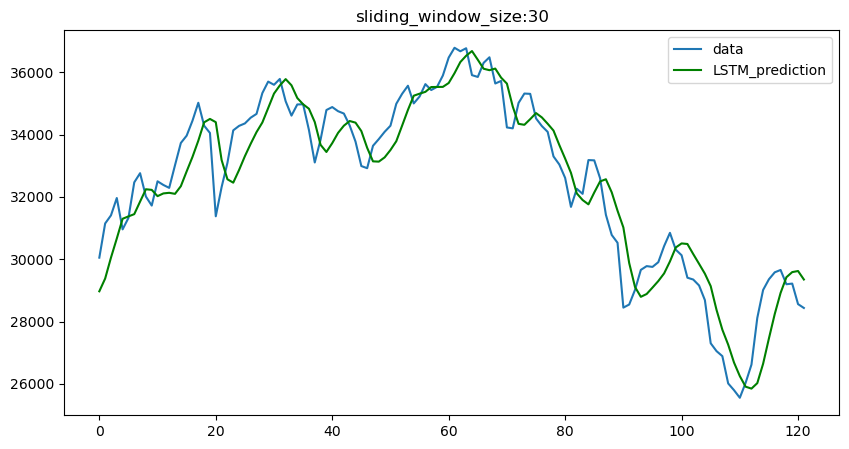

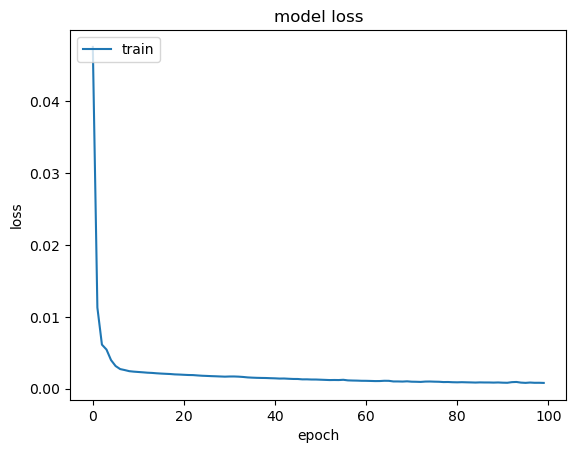

In [41]:
result_1 = LSTM_model(train_coefficients[0],test_coefficients[0],timestamp,1,batch_size,epochs)

122
122
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                4352      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 0s 36ms/step - loss: 0.1037 - accuracy: 0.0017
Epoch 2/100
10/10 [==============================] - 0s 36ms/step - loss: 0.0183 - accuracy: 0.0017
Epoch 3/100
10/10 [==============================] - 0s 36ms/step - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 36ms/step - loss: 0.0118 - accuracy: 0.0017
Epoch 5/100
10/10 [=================

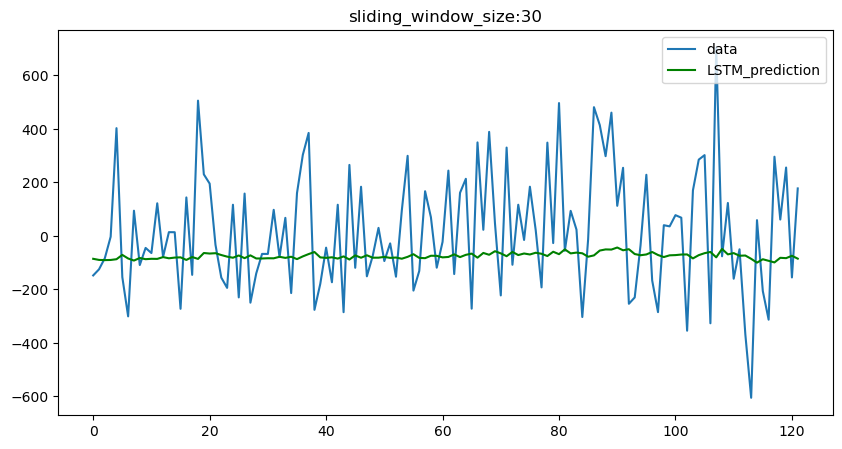

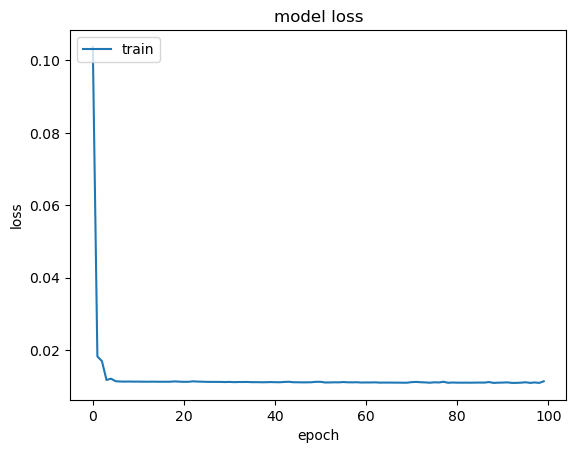

In [42]:
result_2 = LSTM_model(train_coefficients[1],test_coefficients[1],timestamp,2,batch_size,epochs)

244
244
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32)                4352      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 1s 34ms/step - loss: 0.0325 - accuracy: 8.3822e-04
Epoch 2/100
20/20 [==============================] - 1s 34ms/step - loss: 0.0084 - accuracy: 8.3822e-04
Epoch 3/100
20/20 [==============================] - 1s 34ms/step - loss: 0.0072 - accuracy: 8.3822e-04
Epoch 4/100
20/20 [==============================] - 1s 33ms/step - loss: 0.0071 - accuracy: 8.3822e-04
Epoch 5/100
20/20 [=====

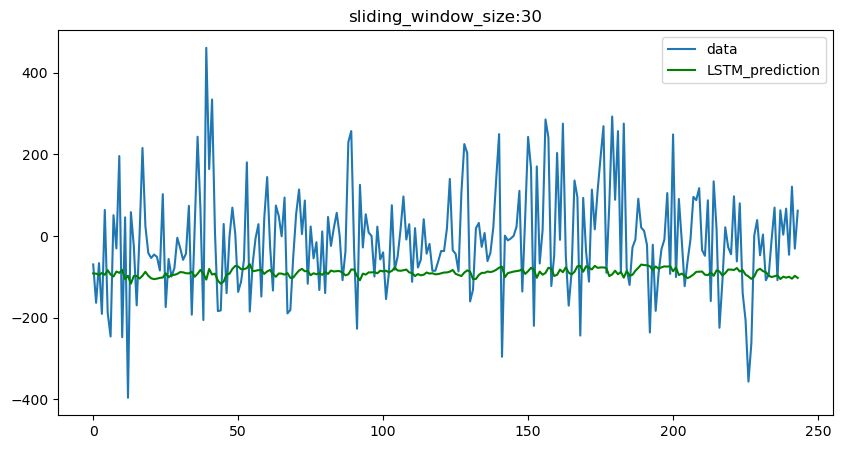

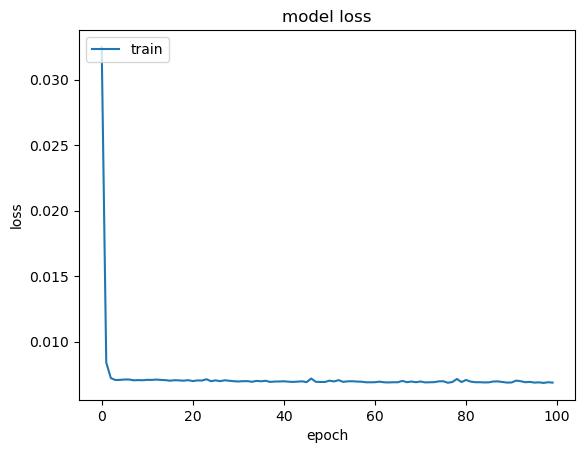

In [43]:
result_3 = LSTM_model(train_coefficients[2],test_coefficients[2],timestamp,3,batch_size,epochs)

In [907]:
final_result = []
final_result.append(result_1.ravel())
final_result.append(result_2.ravel())
final_result.append(result_3.ravel())
final_result

[array([28481.31 , 30378.547, 31271.559, 31491.027, 32179.25 , 30522.006,
        31653.604, 32526.975, 32730.566, 31727.414, 31748.377, 32644.238,
        32138.406, 32368.598, 33174.766, 33829.09 , 33947.27 , 34603.02 ,
        35045.25 , 33834.145, 34149.246, 30036.004, 33349.336, 32542.678,
        34932.11 , 33811.02 , 34795.04 , 34229.26 , 34845.61 , 35343.664,
        35726.81 , 35416.742, 35877.016, 34503.695, 34689.715, 34882.29 ,
        34916.527, 33757.508, 32882.473, 34191.082, 34839.48 , 34895.285,
        34699.58 , 34622.723, 34055.035, 33612.34 , 32665.965, 33023.652,
        33775.543, 33825.13 , 34227.508, 34252.242, 35260.39 , 35157.92 ,
        35721.24 , 34502.977, 35558.945, 35347.19 , 35441.477, 35448.77 ,
        35995.137, 36524.812, 36773.254, 36511.125, 36795.242, 35295.918,
        36142.08 , 36076.17 , 36636.49 , 35027.49 , 36145.848, 33052.246,
        34971.773, 34653.242, 35717.887, 34988.9  , 34406.125, 34160.22 ,
        33969.027, 32964.953, 33111.29

In [909]:
updated_original = pywt.waverec(final_result, wavelet)

LSTM_R2= 0.9283401283599999
LSTM_MSE= 143869.8271312186
LSTM_MAE= 281.8245049148309
LSTM_RMSE= 379.3017626260371
LSTM_MRE= 1.7606455086196269


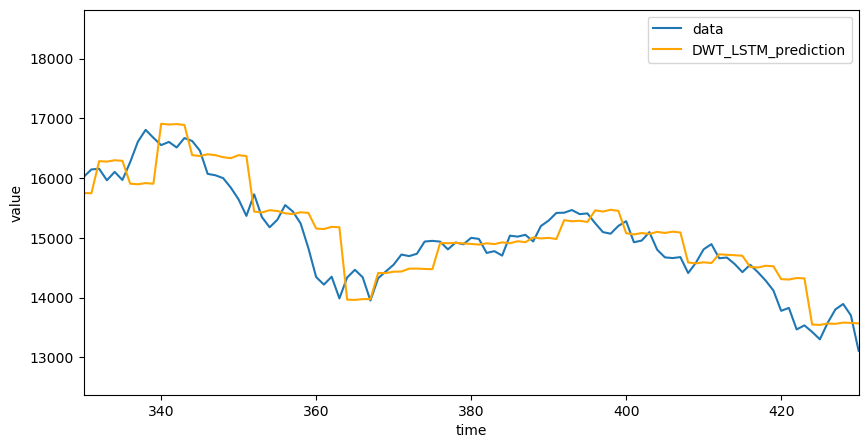

In [913]:
plt.figure(figsize=(10 ,5))
# plt.title("sliding_window_size:{}".format(timestep))
k = test_dataframe_Close['Close'].tolist()
r = updated_original.flatten()

LSTM_R2 = r2_score(test_dataframe_Close['Close'].tolist(),updated_original)
LSTM_MSE = mean_squared_error(test_dataframe_Close['Close'].tolist(),updated_original)
LSTM_MAE = mean_absolute_error(test_dataframe_Close['Close'].tolist(),updated_original)
LSTM_MRE = np.mean(np.abs((k - r) / k)) * 100

plt.xlim([330,430])
plt.ylabel("value")
plt.xlabel("time")
print("LSTM_R2=",LSTM_R2)
print("LSTM_MSE=",LSTM_MSE)
print("LSTM_MAE=",LSTM_MAE)
print("LSTM_RMSE=",sqrt(LSTM_MSE))
print("LSTM_MRE=",LSTM_MRE)

plt.plot(test_dataframe_Close['Close'].tolist())
plt.plot(updated_original,c='orange')
plt.legend(['data', 'DWT_LSTM_prediction'], loc='upper right')
plt.show()

122
122
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                4352      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
17/17 [==============================] - 1s 64ms/step - loss: 0.0794 - accuracy: 0.0021
Epoch 2/100
17/17 [==============================] - 1s 64ms/step - loss: 0.0090 - accuracy: 0.0021
Epoch 3/100
17/17 [==============================] - 1s 65ms/step - loss: 0.0045 - accuracy: 0.0021
Epoch 4/100
17/17 [==============================] - 1s 64ms/step - loss: 0.0034 - accuracy: 0.0021
Epoch 5/100
17/17 [=====================

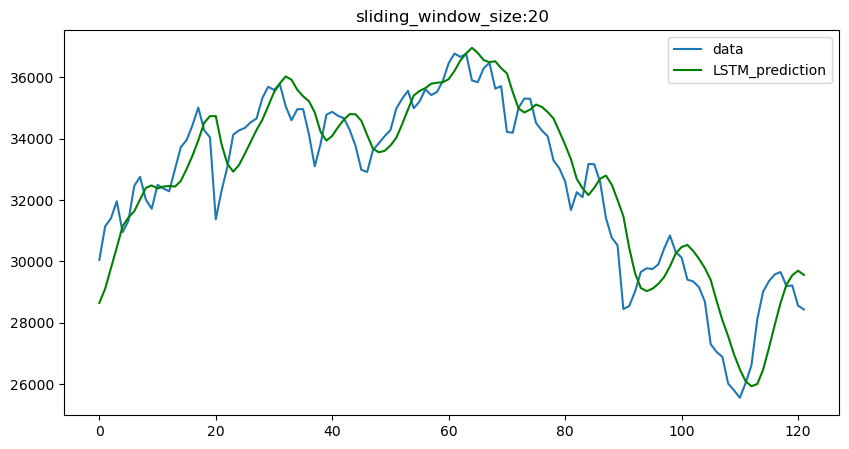

122
122
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32)                4352      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
17/17 [==============================] - 1s 69ms/step - loss: 0.1695 - accuracy: 0.0010
Epoch 2/100
17/17 [==============================] - 1s 64ms/step - loss: 0.0159 - accuracy: 0.0010
Epoch 3/100
17/17 [==============================] - 1s 63ms/step - loss: 0.0099 - accuracy: 0.0010
Epoch 4/100
17/17 [==============================] - 1s 59ms/step - loss: 0.0085 - accuracy: 0.0010
Epoch 5/100
17/17 [=====================

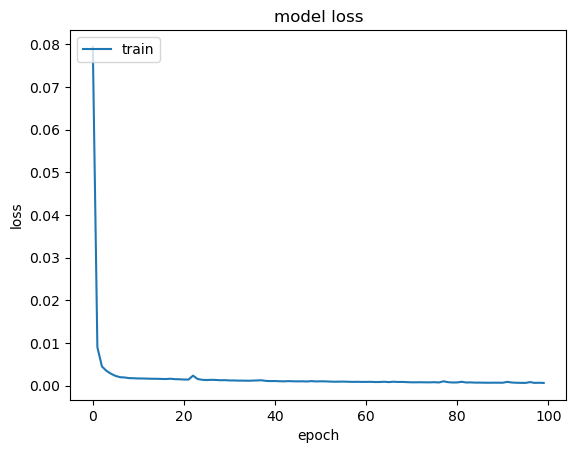

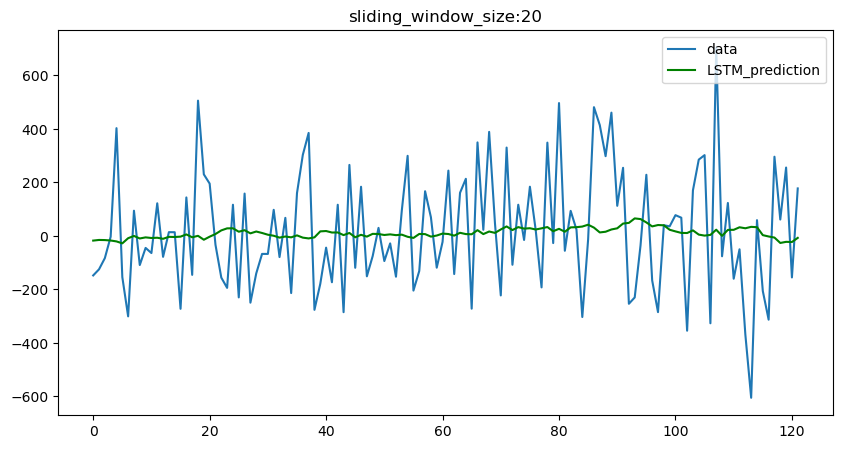

244
244
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 32)                4352      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 2s 65ms/step - loss: 0.0280 - accuracy: 0.0000e+00
Epoch 2/100
33/33 [==============================] - 2s 63ms/step - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 3/100
33/33 [==============================] - 2s 64ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 4/100
33/33 [==============================] - 2s 63ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 5/100
33/33 [=====

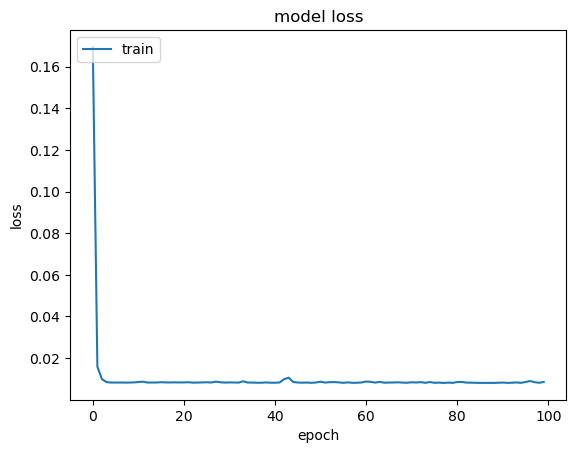

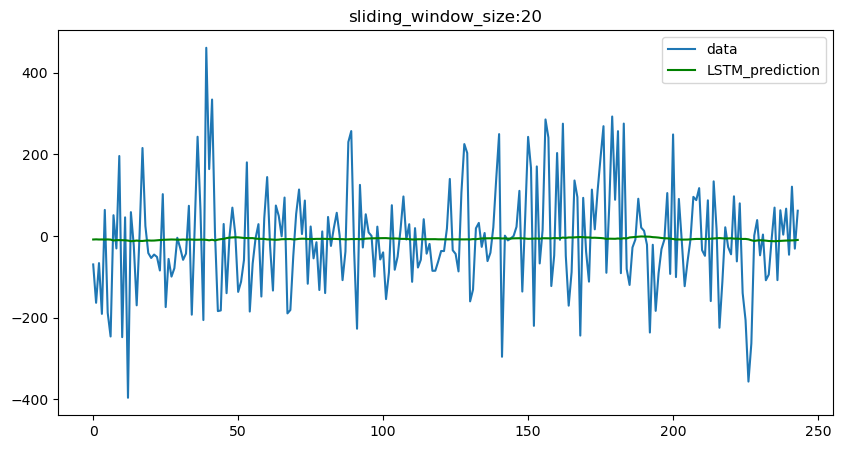

122
122
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 32)                4352      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 1s 73ms/step - loss: 0.0715 - accuracy: 0.0010
Epoch 2/100
16/16 [==============================] - 1s 73ms/step - loss: 0.0083 - accuracy: 0.0021
Epoch 3/100
16/16 [==============================] - 1s 67ms/step - loss: 0.0042 - accuracy: 0.0021
Epoch 4/100
16/16 [==============================] - 1s 74ms/step - loss: 0.0029 - accuracy: 0.0021
Epoch 5/100
16/16 [=====================

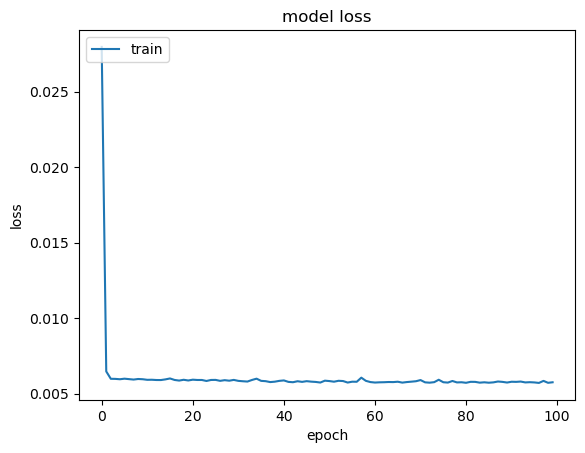

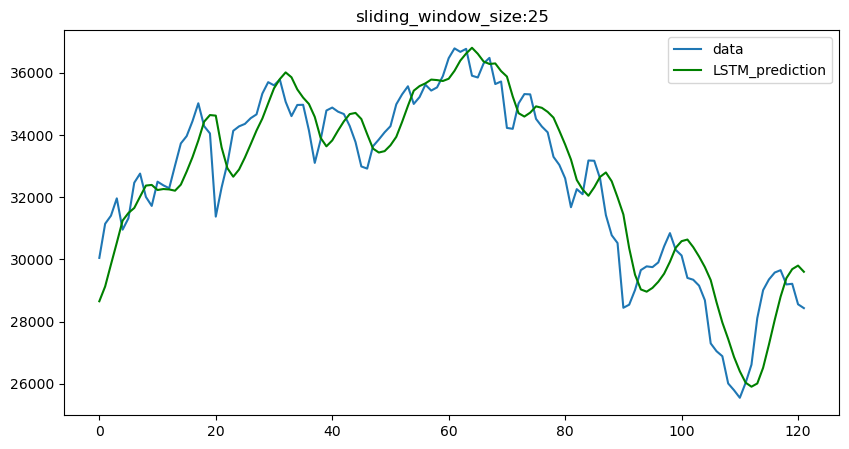

122
122
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 32)                4352      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 1s 74ms/step - loss: 0.0549 - accuracy: 0.0010
Epoch 2/100
16/16 [==============================] - 1s 72ms/step - loss: 0.0118 - accuracy: 0.0021
Epoch 3/100
16/16 [==============================] - 1s 74ms/step - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 1s 72ms/step - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 5/100
16/16 [=============

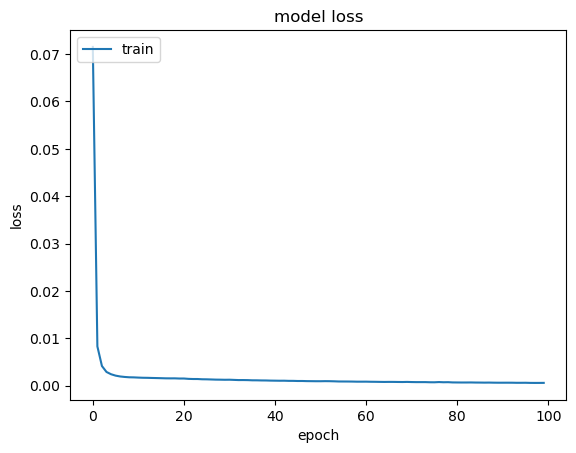

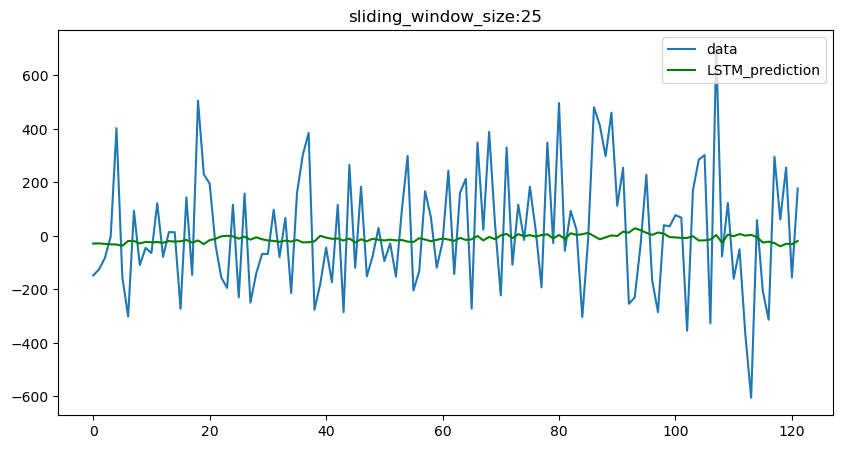

244
244
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 32)                4352      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 2s 73ms/step - loss: 0.0978 - accuracy: 0.0000e+00
Epoch 2/100
33/33 [==============================] - 2s 73ms/step - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 3/100
33/33 [==============================] - 2s 73ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 4/100
33/33 [==============================] - 2s 74ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 5/100
33/33 [=====

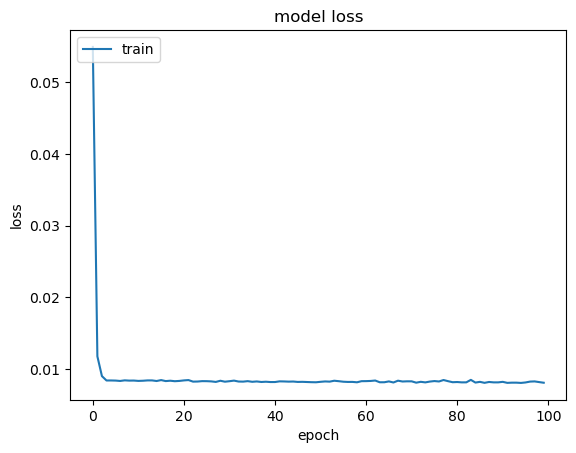

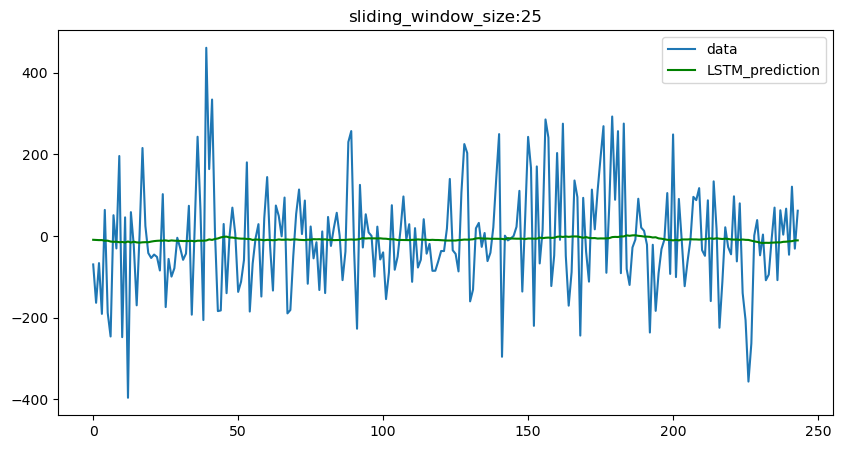

122
122
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 32)                4352      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 1s 82ms/step - loss: 0.1732 - accuracy: 0.0011
Epoch 2/100
16/16 [==============================] - 1s 83ms/step - loss: 0.0177 - accuracy: 0.0021
Epoch 3/100
16/16 [==============================] - 1s 82ms/step - loss: 0.0083 - accuracy: 0.0021
Epoch 4/100
16/16 [==============================] - 1s 82ms/step - loss: 0.0056 - accuracy: 0.0021
Epoch 5/100
16/16 [=====================

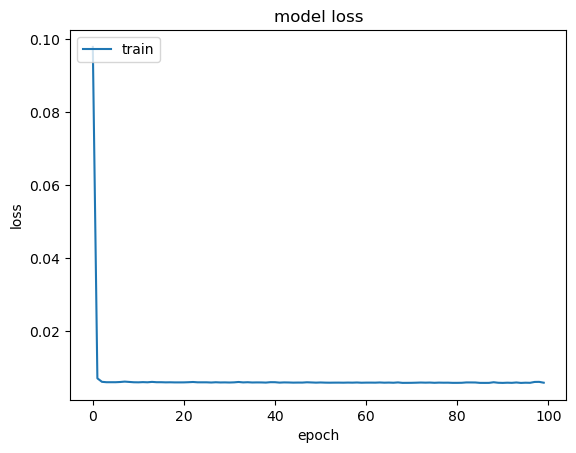

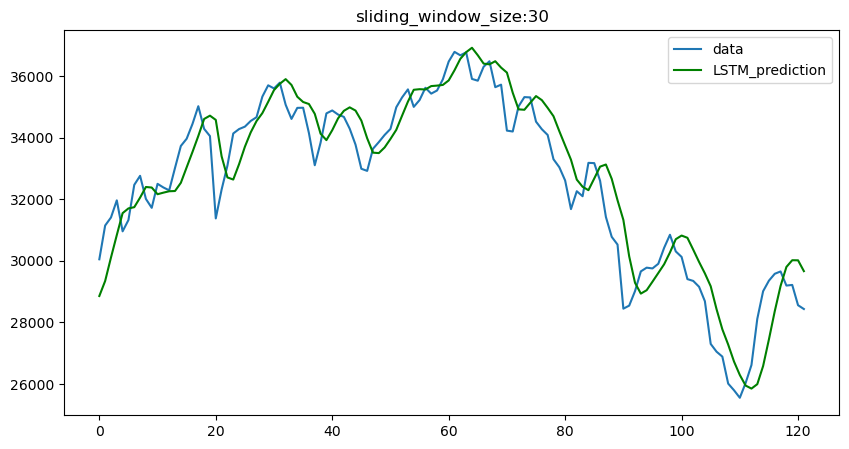

122
122
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 32)                4352      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 1s 83ms/step - loss: 0.0812 - accuracy: 0.0011
Epoch 2/100
16/16 [==============================] - 1s 82ms/step - loss: 0.0128 - accuracy: 0.0011
Epoch 3/100
16/16 [==============================] - 1s 84ms/step - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 1s 82ms/step - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 5/100
16/16 [============

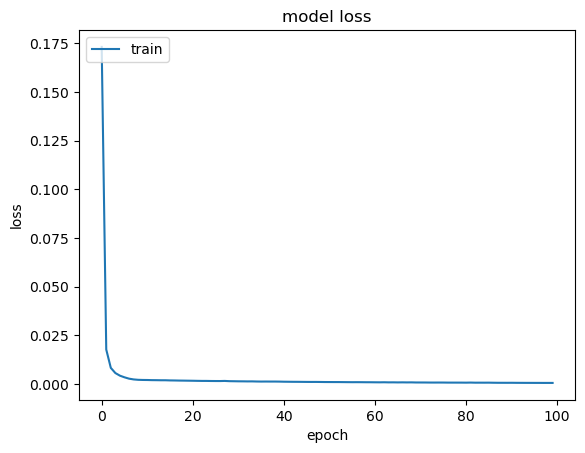

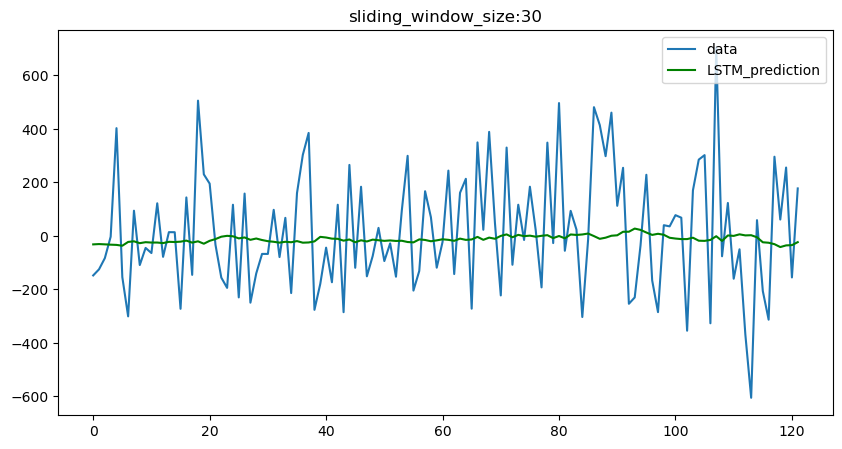

244
244
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 32)                4352      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 3s 84ms/step - loss: 0.1058 - accuracy: 5.1760e-04
Epoch 2/100
33/33 [==============================] - 3s 82ms/step - loss: 0.0066 - accuracy: 5.1760e-04
Epoch 3/100
33/33 [==============================] - 3s 82ms/step - loss: 0.0059 - accuracy: 5.1760e-04
Epoch 4/100
33/33 [==============================] - 3s 83ms/step - loss: 0.0059 - accuracy: 5.1760e-04
Epoch 5/100
33/33 [====

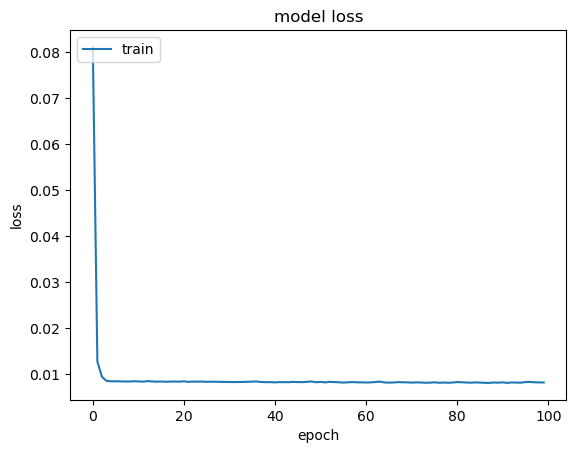

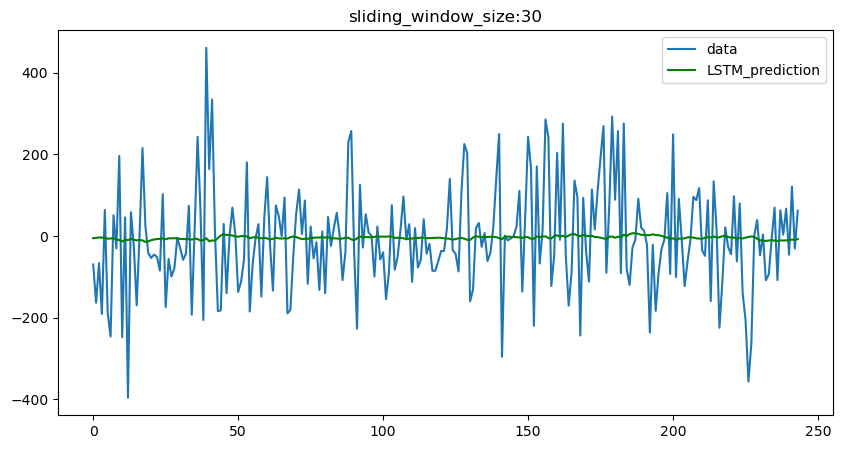

122
122
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 32)                4352      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 2s 95ms/step - loss: 0.0972 - accuracy: 0.0011
Epoch 2/100
16/16 [==============================] - 1s 93ms/step - loss: 0.0083 - accuracy: 0.0021
Epoch 3/100
16/16 [==============================] - 1s 91ms/step - loss: 0.0049 - accuracy: 0.0021
Epoch 4/100
16/16 [==============================] - 1s 92ms/step - loss: 0.0033 - accuracy: 0.0021
Epoch 5/100
16/16 [====================

Epoch 74/100
16/16 [==============================] - 1s 93ms/step - loss: 6.1847e-04 - accuracy: 0.0021
Epoch 75/100
16/16 [==============================] - 1s 92ms/step - loss: 6.2673e-04 - accuracy: 0.0021
Epoch 76/100
16/16 [==============================] - 1s 92ms/step - loss: 6.2917e-04 - accuracy: 0.0021
Epoch 77/100
16/16 [==============================] - 1s 92ms/step - loss: 6.2818e-04 - accuracy: 0.0021
Epoch 78/100
16/16 [==============================] - 2s 98ms/step - loss: 5.9783e-04 - accuracy: 0.0021
Epoch 79/100
16/16 [==============================] - 1s 93ms/step - loss: 5.9441e-04 - accuracy: 0.0021
Epoch 80/100
16/16 [==============================] - 1s 93ms/step - loss: 5.9747e-04 - accuracy: 0.0021
Epoch 81/100
16/16 [==============================] - 1s 94ms/step - loss: 5.6250e-04 - accuracy: 0.0021
Epoch 82/100
16/16 [==============================] - 1s 94ms/step - loss: 5.7163e-04 - accuracy: 0.0021
Epoch 83/100
16/16 [==============================] - 2

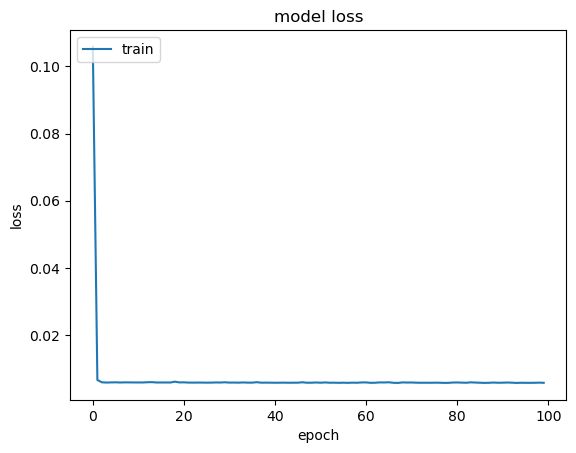

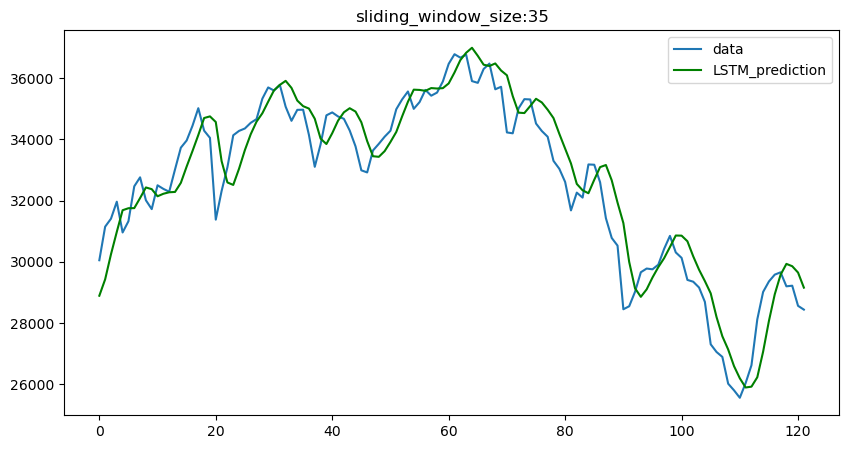

122
122
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 32)                4352      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 1s 88ms/step - loss: 0.1450 - accuracy: 0.0011
Epoch 2/100
16/16 [==============================] - 1s 92ms/step - loss: 0.0169 - accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 2s 94ms/step - loss: 0.0096 - accuracy: 0.0011
Epoch 4/100
16/16 [==============================] - 1s 94ms/step - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 5/100
16/16 [============

16/16 [==============================] - 1s 92ms/step - loss: 0.0083 - accuracy: 0.0011
Epoch 76/100
16/16 [==============================] - 1s 93ms/step - loss: 0.0082 - accuracy: 0.0011
Epoch 77/100
16/16 [==============================] - 1s 92ms/step - loss: 0.0083 - accuracy: 0.0011
Epoch 78/100
16/16 [==============================] - 1s 92ms/step - loss: 0.0082 - accuracy: 0.0011
Epoch 79/100
16/16 [==============================] - 1s 93ms/step - loss: 0.0083 - accuracy: 0.0011
Epoch 80/100
16/16 [==============================] - 1s 93ms/step - loss: 0.0085 - accuracy: 0.0011
Epoch 81/100
16/16 [==============================] - 1s 93ms/step - loss: 0.0084 - accuracy: 0.0011
Epoch 82/100
16/16 [==============================] - 1s 93ms/step - loss: 0.0083 - accuracy: 0.0011
Epoch 83/100
16/16 [==============================] - 1s 86ms/step - loss: 0.0082 - accuracy: 0.0011
Epoch 84/100
16/16 [==============================] - 1s 94ms/step - loss: 0.0083 - accuracy: 0.0011
Epo

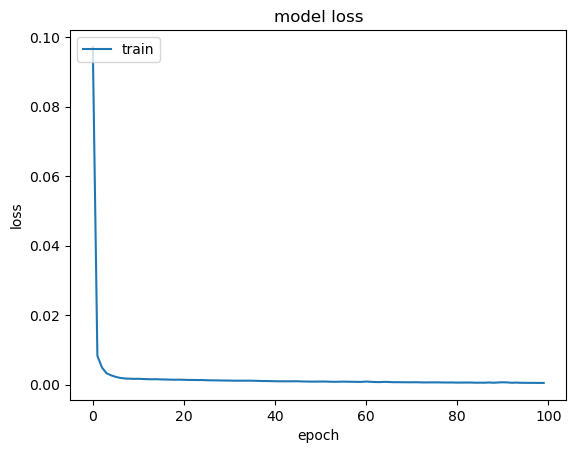

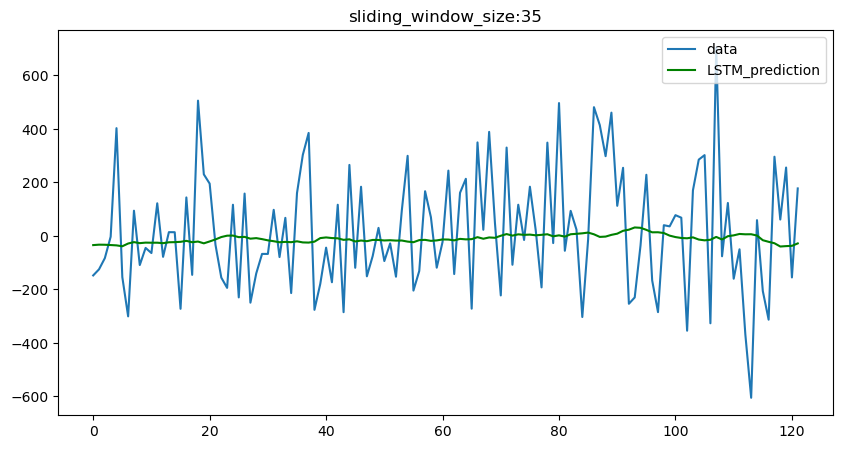

244
244
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 32)                4352      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 3s 93ms/step - loss: 0.0567 - accuracy: 5.1894e-04
Epoch 2/100
33/33 [==============================] - 3s 93ms/step - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 3/100
33/33 [==============================] - 3s 92ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 4/100
33/33 [==============================] - 3s 93ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 5/100
33/33 [====

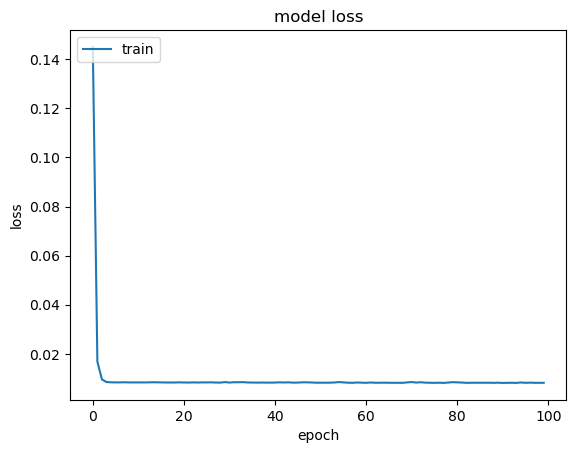

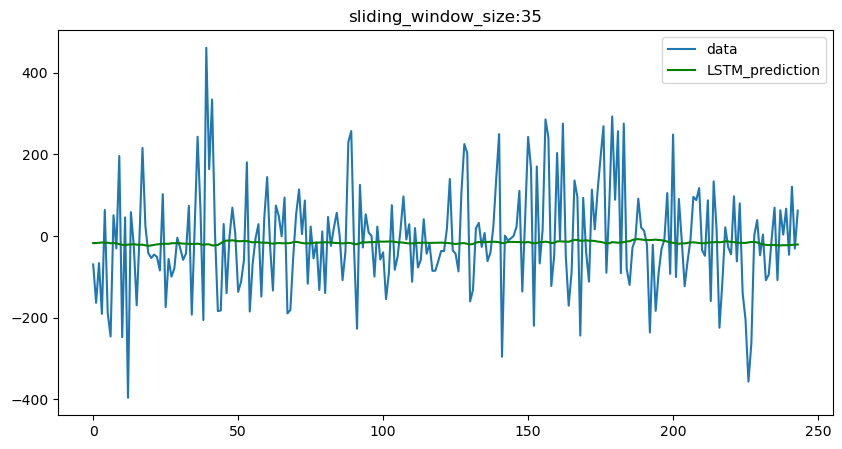

122
122
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 32)                4352      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 2s 101ms/step - loss: 0.2083 - accuracy: 0.0011
Epoch 2/100
16/16 [==============================] - 2s 103ms/step - loss: 0.0184 - accuracy: 0.0021
Epoch 3/100
16/16 [==============================] - 2s 104ms/step - loss: 0.0099 - accuracy: 0.0021
Epoch 4/100
16/16 [==============================] - 2s 99ms/step - loss: 0.0066 - accuracy: 0.0021
Epoch 5/100
16/16 [=================

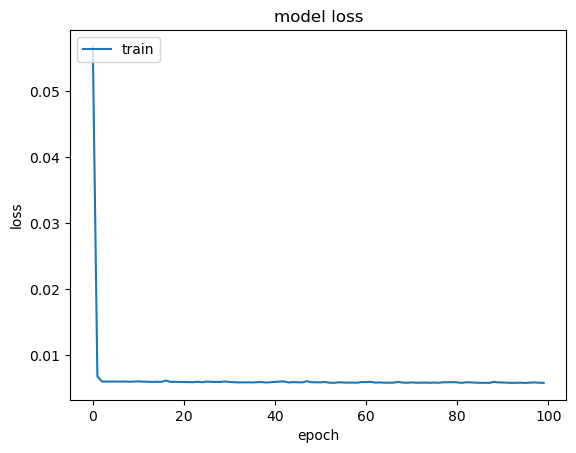

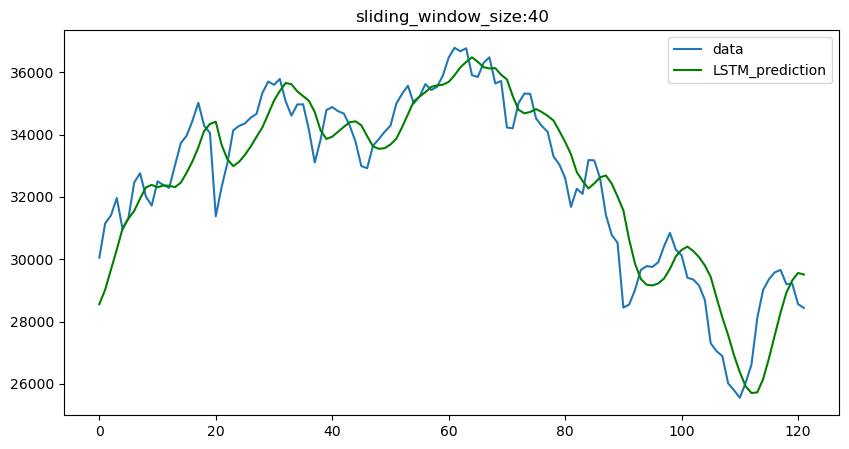

122
122
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 32)                4352      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 2s 104ms/step - loss: 0.0306 - accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 2s 104ms/step - loss: 0.0104 - accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 1s 92ms/step - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 2s 106ms/step - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 5/100
16/16 [=

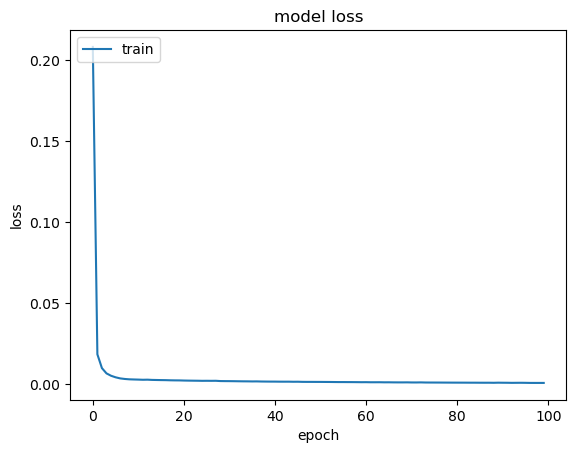

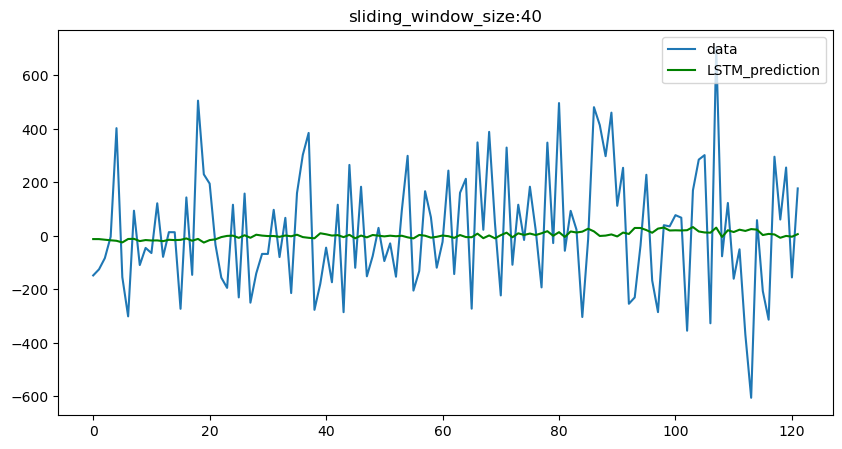

244
244
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 32)                4352      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 3s 102ms/step - loss: 0.0873 - accuracy: 0.0000e+00
Epoch 2/100
33/33 [==============================] - 3s 102ms/step - loss: 0.0063 - accuracy: 5.2029e-04
Epoch 3/100
33/33 [==============================] - 3s 103ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 4/100
33/33 [==============================] - 3s 101ms/step - loss: 0.0059 - accuracy: 5.2029e-04
Epoch 5/100
33/33 [

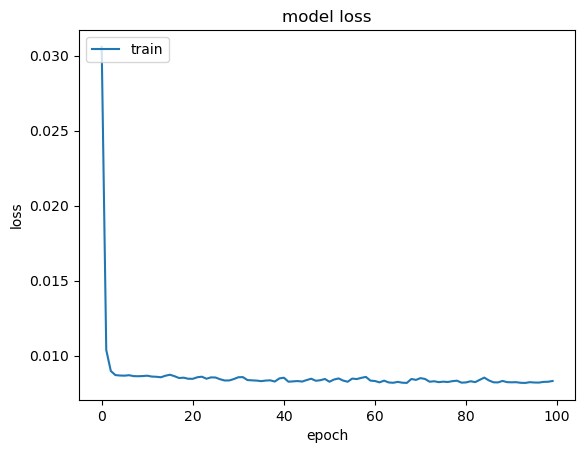

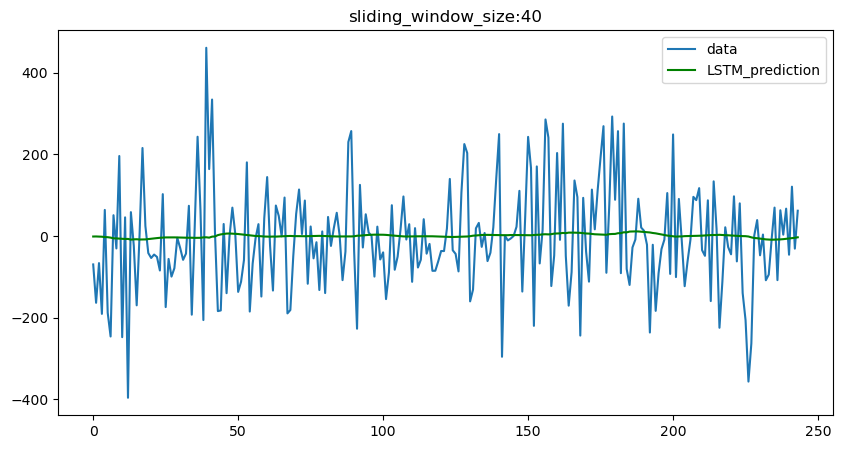

122
122
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 32)                4352      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 2s 111ms/step - loss: 0.0972 - accuracy: 0.0011
Epoch 2/100
16/16 [==============================] - 2s 111ms/step - loss: 0.0082 - accuracy: 0.0021
Epoch 3/100
16/16 [==============================] - 2s 112ms/step - loss: 0.0043 - accuracy: 0.0021
Epoch 4/100
16/16 [==============================] - 2s 112ms/step - loss: 0.0031 - accuracy: 0.0021
Epoch 5/100
16/16 [================

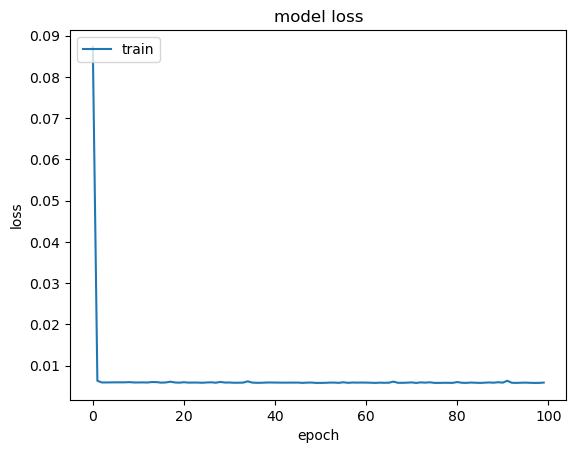

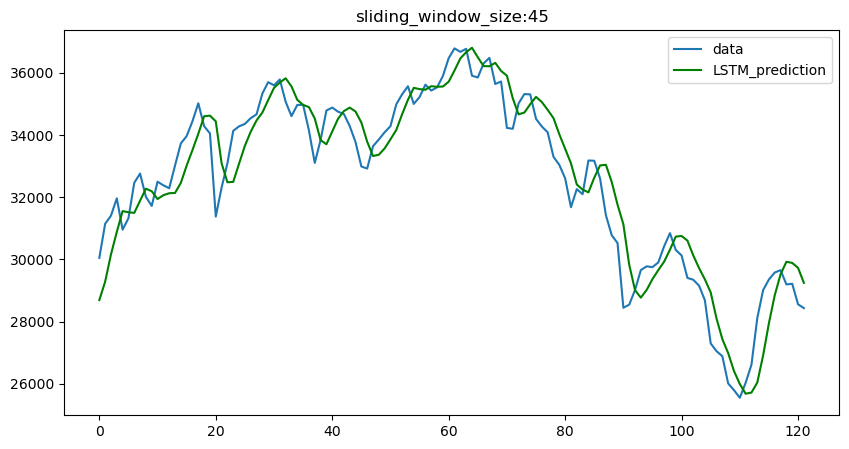

122
122
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 32)                4352      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 2s 111ms/step - loss: 0.1596 - accuracy: 0.0011
Epoch 2/100
16/16 [==============================] - 2s 110ms/step - loss: 0.0161 - accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 2s 111ms/step - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 2s 111ms/step - loss: 0.0086 - accuracy: 0.0011
Epoch 5/100
16/16 [========

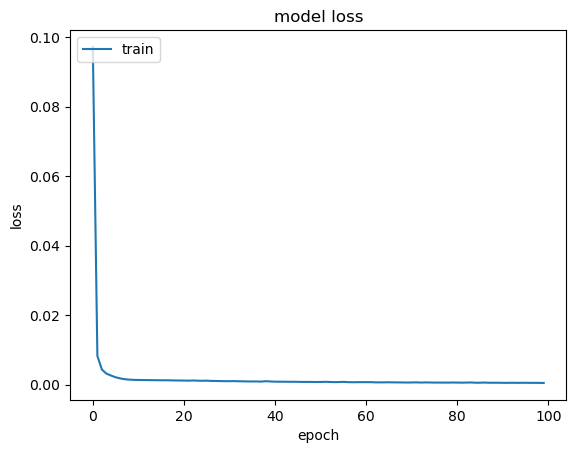

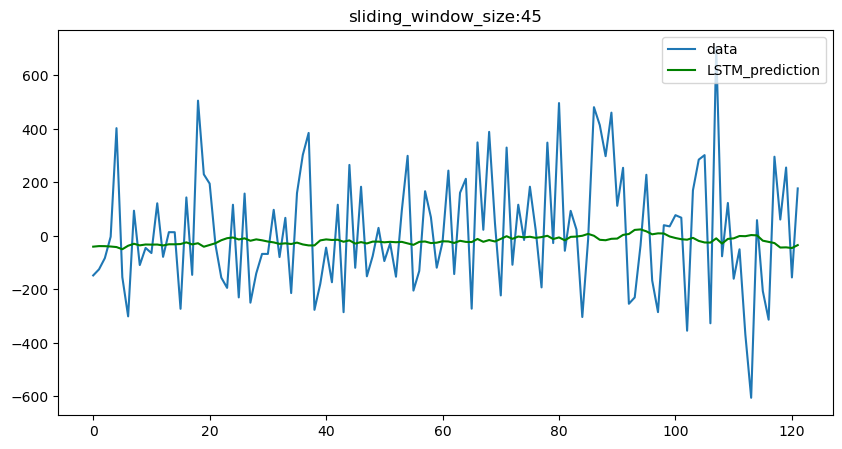

244
244
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 32)                4352      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 4s 111ms/step - loss: 0.0825 - accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 4s 113ms/step - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 4s 112ms/step - loss: 0.0060 - accuracy: 5.2165e-04
Epoch 4/100
32/32 [==============================] - 4s 115ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 5/100
32/32 [

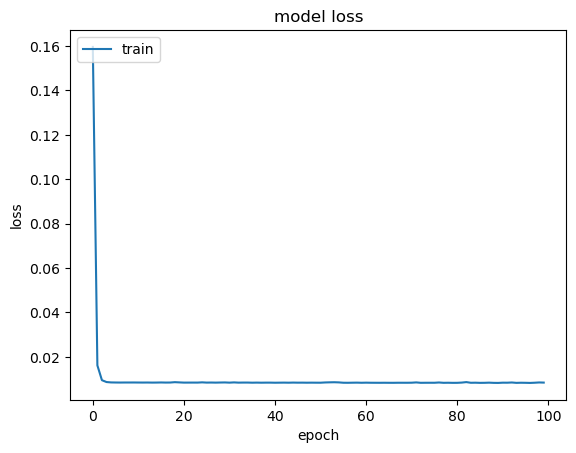

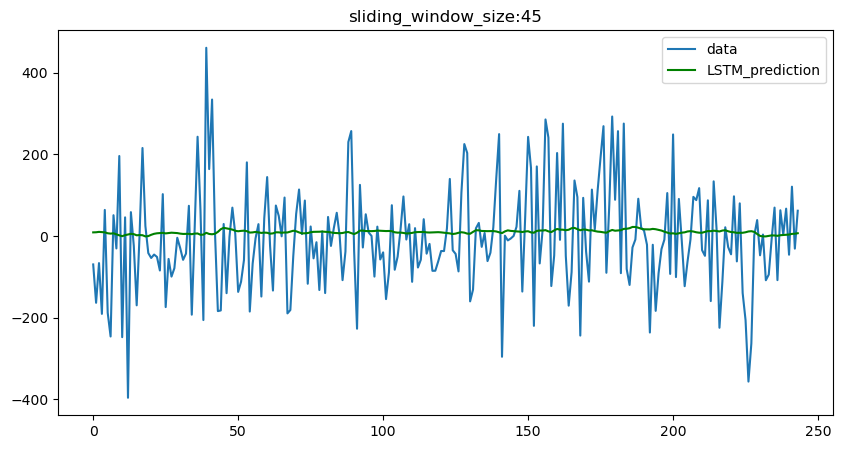

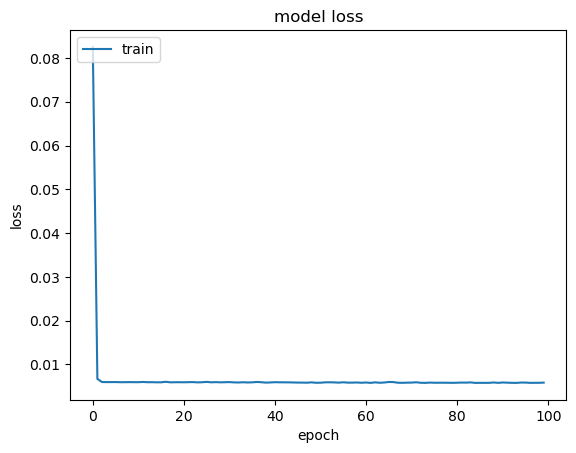

In [42]:
# sliding window 實驗
LSTM_R2 = []
LSTM_MSE = []
LSTM_MAE = []
LSTM_MRE = []
LSTM_MAPE = []
for look_back in range(20,50,5):
    result_1 = LSTM_model(train_coefficients[0],test_coefficients[0],look_back,1,batch_size,epochs)
    result_2 = LSTM_model(train_coefficients[1],test_coefficients[1],look_back,2,batch_size,epochs)
    result_3 = LSTM_model(train_coefficients[2],test_coefficients[2],look_back,3,batch_size,epochs)

    final_result = []
    final_result.append(result_1.ravel())
    final_result.append(result_2.ravel())
    final_result.append(result_3.ravel())
    
    updated_original = pywt.waverec(final_result, wavelet)

    k = test_dataframe_Close['Close'].tolist()
    r = updated_original.flatten()
    LSTM_R2.append(r2_score(k,r))
    LSTM_MSE.append(mean_squared_error(k,r))
    LSTM_MAE.append(mean_absolute_error(k,r))
    LSTM_MRE.append(np.mean(np.abs((k - r) / k)) * 100)
    LSTM_MAPE.append((abs(r-k)/k).mean())

[0.8481072600925782, 0.85257919393248, 0.8651341839188407, 0.8797637912145192, 0.843307296462307, 0.8843493175397171] [304951.45655228663, 295973.2608932003, 270766.90484436223, 241395.38875791675, 314588.2298525865, 232189.1361563753] [437.27130427126025, 438.07202548668033, 411.06488937628075, 387.8878233862705, 446.4922875576332, 384.88194399974384] [2.7802794440325997, 2.7778853815118514, 2.6123555293759493, 2.4510973701051824, 2.8379002562525657, 2.4305415431178896] [0.027802794440325997, 0.027778853815118514, 0.026123555293759492, 0.024510973701051823, 0.028379002562525655, 0.024305415431178895]


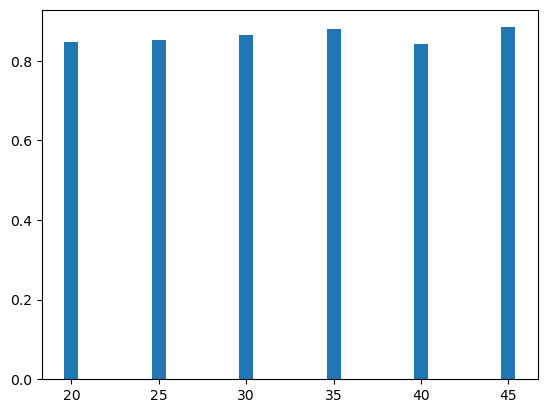

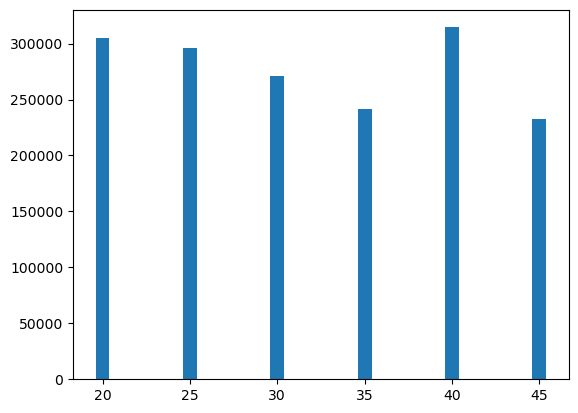

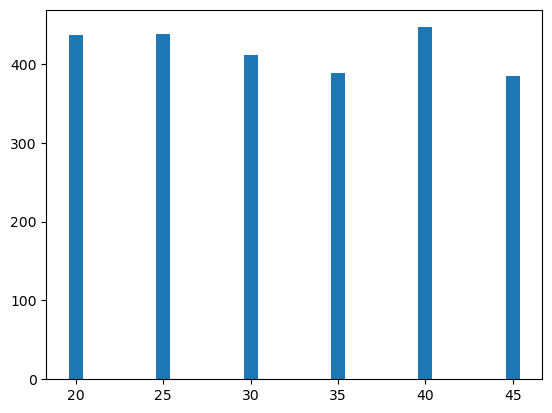

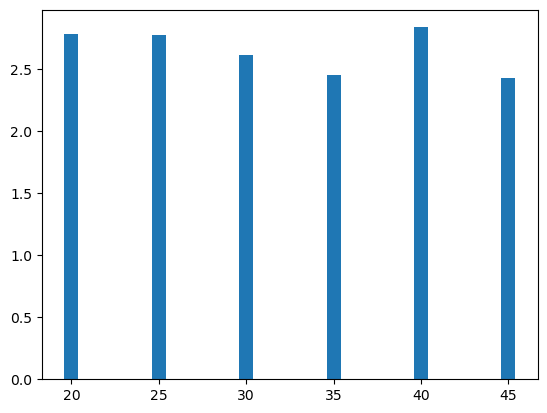

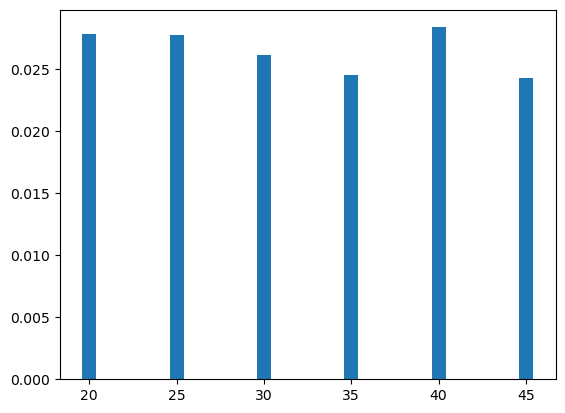

In [43]:
print(LSTM_R2, LSTM_MSE, LSTM_MAE, LSTM_MRE, LSTM_MAPE)
categories = [20, 25, 30, 35, 40, 45]
plt.bar(categories, LSTM_R2)
plt.show()
plt.bar(categories, LSTM_MSE)
plt.show()
plt.bar(categories, LSTM_MAE)
plt.show()
plt.bar(categories, LSTM_MRE)
plt.show()
plt.bar(categories, LSTM_MAPE)
plt.show()

# 抓新資料少量分解更新子訊號

In [201]:
# 取一段時間的金融資料，傳給DWT_decompose()
def take_latest_several_data(start_date):
    start_date = datetime.strptime(start_date, '%Y-%m-%d').date()
    end_date = start_date - timedelta(days=50)

    financial_new_data = yf.download("^TWII", start=end_date, end=start_date)
    financial_new_data = financial_new_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    financial_new_data = financial_new_data.sort_index(ascending=False)
    financial_new_data['Close'] = financial_new_data['Close'].replace('', np.nan)
    financial_new_data['Close'] = financial_new_data['Close'].astype(float) 

    financial_new_data_df = financial_new_data
    financial_new_data = financial_new_data['Close'].to_list()

    return financial_new_data_df[:4],list(reversed(financial_new_data[:4]))

In [202]:
# 進行小波轉換
def DWT_decompose(coeff_num,old_data_list, end_date, wavelet, level):
    financial_new_data_df,financial_new_data = take_latest_several_data(end_date)
    new_data_coeff = pywt.wavedec(financial_new_data, wavelet, level=level)
    
    if coeff_num == 1:
        old_data_list[0] = np.append(old_data_list[0],new_data_coeff[0])
        del old_data_list[0][:len(old_data_list[0])-32]
    elif coeff_num == 2:
        old_data_list[1] = np.append(old_data_list[1],new_data_coeff[1])
        del old_data_list[1][:len(old_data_list[1])-32]
    elif coeff_num == 3:
        old_data_list[2] = np.append(old_data_list[2],new_data_coeff[2])
        del old_data_list[2][:len(old_data_list[2])-32]
    return old_data_list,new_data_coeff

# 增量預測

In [117]:
def predict_financial(coeff,coeff_num, model_path,old_data_list,date_range_list,wavelet):
    window_size = 30
    feature_len = 1
    # 對資料進行處理以進行後續預測
    scaler = MinMaxScaler(feature_range=(0,1))
    test = np.array(coeff[-(window_size+1):])
    test = test[::-1]
    test_scaled_data = scaler.fit_transform(test.reshape(-1,1))
    x_test,y_test = createSlidingWindow(test_scaled_data,window_size)
    print(test_scaled_data)
    vanilla_model = load_model(model_path)
    final_predict = []
    #預測
    if coeff_num == 3: 
        test_predict = vanilla_model.predict(test_scaled_data)
        predict_Close = scaler.inverse_transform(test_predict)
        final_predict.append(predict_Close[0][0])
        
        multi_predict = coeff
        multi_predict = np.append(multi_predict,predict_Close[0][0])
        print('-------------------',multi_predict[-10:])
        test = np.array(multi_predict)
        test = test[::-1]
        test_scaled_data = scaler.fit_transform(test.reshape(-1,1))
        x_test,y_test = createSlidingWindow(test_scaled_data,window_size)
        test_predict = vanilla_model.predict(test_scaled_data)
        predict_Close = scaler.inverse_transform(test_predict)
        final_predict.append(predict_Close[0][0])
        print(final_predict)
    else:
        test_predict = vanilla_model.predict(test_scaled_data)
        predict_Close = scaler.inverse_transform(test_predict)
        final_predict.append(predict_Close[0][0])

    data_list,new_data_coeff = DWT_decompose(coeff_num,old_data_list,date_range_list,wavelet,2)

    test_new = np.array(data_list[coeff_num-1])
    test_new = test_new[::-1]
    test_scaled_data_new = scaler.fit_transform(test_new.reshape(-1,1))
    x_test_new,y_test_new = createSlidingWindow(test_scaled_data_new[:(window_size+1),:],window_size)

    del vanilla_model
    print(final_predict)
    return final_predict

In [118]:
# 預測的時段
def predict_date_range(old_data_list,date_range_list,wavelet):
    predict_list = []
    execute_time_list = []
    all_time_start = time.time()
    start = time.time()

    coefficient1_result = predict_financial(old_data_list[0],1,'./model/DWT_simple-LSTM-model-result-1-Copy1.h5',
                                            old_data_list,date_range_list,wavelet)
    coefficient2_result = predict_financial(old_data_list[1],2,'./model/DWT_simple-LSTM-model-result-2-Copy1.h5',
                                            old_data_list,date_range_list,wavelet)
    coefficient3_result = predict_financial(old_data_list[2],3,'./model/DWT_simple-LSTM-model-result-3-Copy1.h5',
                                            old_data_list,date_range_list,wavelet)
    
    predict_coeff = []
    temp = []
    predict_coeff.append(np.array(coefficient1_result))
    predict_coeff.append(np.array(coefficient2_result))
    predict_coeff.append(np.array(coefficient3_result))
    
    predict_result = pywt.waverec(predict_coeff, wavelet)
    predict_list.append(predict_result)  
    end = time.time()
    execute_time_list.append(end - start)
    all_time_end = time.time()
    print("執行時間：%f 秒" % (all_time_end - all_time_start))
    return predict_list,coefficient1_result,coefficient2_result,coefficient3_result

In [103]:
start_day_1 = '2020-12-26'
end_day_1 = '2022-06-30'

In [104]:
start_day_1st_test = '2021-01-01'
end_day_1st_test = '2022-01-01'

In [105]:
start_day_2nd_test = '2022-01-01'
end_day_2nd_test = '2023-01-01'

In [249]:
start_day_few_data = '2020-12-26'
end_day_few_data = '2021-04-02'

In [250]:
# 取日期範圍
def datelist(start_date,end_date):
    date_list = []
    start_date = datetime.strptime(start_date, '%Y-%m-%d')  # 起始日期
    end_date = datetime.strptime(end_date, '%Y-%m-%d')    # 结束日期
    current_date = start_date
    while current_date <= end_date:
        date_list.append(current_date.strftime('%Y-%m-%d'))
        current_date += timedelta(days=1)
    return date_list

In [251]:
# 取有資料的日期
def date_with_value(start_day, end_day):
    true_day_value = get_true_value(start_day,end_day)
    predict_datelist = datelist(start_day,end_day)
    predict_df = pd.DataFrame({'Date': predict_datelist})
    execute_time_df = pd.DataFrame({'Date': predict_datelist})
    predict_df = predict_df.set_index('Date')
    execute_time_df = execute_time_df.set_index('Date')
    merged_df = pd.concat([true_day_value, predict_df], axis=1)
    merged_df = pd.concat([merged_df, execute_time_df], axis=1)
    merged_df = merged_df.dropna()
    merged_df = merged_df.reset_index()
    date_range_list = merged_df['Date'].tolist()
    return date_range_list

In [74]:
date_range_list_1 = date_with_value(start_day_1,end_day_1)
len(date_range_list_1)

364

In [45]:
date_range_list_1st = date_with_value(start_day_1st_test,end_day_1st_test)
len(date_range_list_1st)

243

In [46]:
date_range_list_2nd = date_with_value(start_day_2nd_test,end_day_2nd_test)
len(date_range_list_2nd)

246

In [252]:
date_range_list_few_data = date_with_value(start_day_few_data,end_day_few_data)
len(date_range_list_few_data)

60

In [172]:
# 非incremental的預測 (date_range_list_1108)
predict_list_s = []
coeff_predict_list_s = []
coeff_1_predict_s = []
coeff_2_predict_s = []
coeff_3_predict_s = []
all_time_start = time.time()
tain_coefficient_append = train_coefficients
for i in range(int(len(date_range_list_1108)/4)):

    predict_value,coeff1,coeff2,coeff3 = predict_date_range(tain_coefficient_append,date_range_list_1108[4*i+3],wavelet)
    predict_list_s.append(predict_value)
    coeff_1_predict_s.append(coeff1)
    coeff_2_predict_s.append(coeff2)
    coeff_3_predict_s.append(coeff3)

coeff_predict_list_s.append(coeff_1_predict_s)
coeff_predict_list_s.append(coeff_2_predict_s)
coeff_predict_list_s.append(coeff_3_predict_s)
all_time_end = time.time()
print("全部執行時間：%f 秒" % (all_time_end - all_time_start))
predict_list_s = np.array(predict_list_s).ravel()

[[1.        ]
 [0.83206663]
 [0.88698206]
 [0.84960271]
 [0.70064815]
 [0.84560594]
 [0.95375575]
 [0.81106882]
 [0.52677933]
 [0.60927609]
 [0.75473183]
 [0.6070744 ]
 [0.48266397]
 [0.21087452]
 [0.        ]
 [1.        ]
 [0.83206663]
 [0.88698206]
 [0.84960271]
 [0.70064815]
 [0.84560594]
 [0.95375575]
 [0.81106882]
 [0.52677933]
 [0.60927609]
 [0.75473183]
 [0.6070744 ]
 [0.48266397]
 [0.21087452]
 [0.        ]
 [1.        ]]
1/1 [==============================] - 0s 197ms/step
[*********************100%***********************]  1 of 1 completed
[32570.84]
[[0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.60807109

1/1 [==============================] - 0s 182ms/step
[*********************100%***********************]  1 of 1 completed
[31054.05]
[[1.        ]
 [0.16848894]
 [0.21007592]
 [0.21449223]
 [0.74911577]
 [0.49131781]
 [0.89171372]
 [0.        ]
 [0.16848894]
 [0.21007592]
 [0.21449223]
 [0.74911577]
 [0.49131781]
 [0.89171372]
 [0.        ]
 [0.29439915]
 [0.21007592]
 [0.21449223]
 [0.74911577]
 [0.49131781]
 [0.89171372]
 [0.        ]
 [0.29439915]
 [0.80412345]
 [0.21449223]
 [0.74911577]
 [0.49131781]
 [0.89171372]
 [0.        ]
 [0.29439915]
 [0.80412345]]
1/1 [==============================] - 0s 187ms/step
[*********************100%***********************]  1 of 1 completed
[-8.667174]
[[0.55599461]
 [0.68365964]
 [0.67012717]
 [0.        ]
 [0.58334347]
 [0.17586657]
 [0.07498041]
 [0.21488635]
 [0.42137869]
 [1.        ]
 [0.5660068 ]
 [0.03062577]
 [0.65710065]
 [0.85386259]
 [0.31948705]
 [0.20679762]
 [0.67012717]
 [0.        ]
 [0.58334347]
 [0.17586657]
 [0.07498041]
 [0.

1/1 [==============================] - 0s 193ms/step
[*********************100%***********************]  1 of 1 completed
[-225.49077]
[[0.3745693 ]
 [0.31386739]
 [0.46563612]
 [0.        ]
 [0.99621049]
 [1.        ]
 [0.72661451]
 [0.6130271 ]
 [0.49362714]
 [0.59801221]
 [0.58694741]
 [0.03901916]
 [0.51598888]
 [0.18281614]
 [0.46563612]
 [0.        ]
 [0.99621049]
 [1.        ]
 [0.72661451]
 [0.6130271 ]
 [0.49362714]
 [0.59801221]
 [0.58694741]
 [0.03901916]
 [0.51598888]
 [0.18281614]
 [0.10032676]
 [0.2147206 ]
 [0.38355868]
 [0.85666733]
 [0.99621049]]
1/1 [==============================] - 0s 210ms/step
------------------- [   3.10395018   50.33923559   95.27504289  203.42785371  201.92870447
 -192.17767434   -7.9694525   -68.00999978  -43.99599058   28.62891197]
137/137 [==============================] - 0s 627us/step
[28.628912, 29.513866]
[*********************100%***********************]  1 of 1 completed
[28.628912, 29.513866]
執行時間：2.594204 秒
[[0.91195171]
 [1.        

1/1 [==============================] - 0s 203ms/step
------------------- [ -43.99599058  -48.63499776  163.24982544  352.40779474 -187.27764532
   36.18950409  -23.32002257 -189.42658702    4.13629846  109.85903931]
138/138 [==============================] - 0s 557us/step
[109.85904, 8.331841]
[*********************100%***********************]  1 of 1 completed
[109.85904, 8.331841]
執行時間：2.964419 秒
[[0.72446397]
 [0.82421558]
 [0.38430898]
 [0.54780387]
 [0.97141559]
 [0.80538637]
 [0.16044107]
 [0.71079003]
 [0.38282303]
 [0.70198997]
 [0.94011339]
 [0.62594641]
 [0.        ]
 [0.18164073]
 [0.38282303]
 [0.70198997]
 [0.94011339]
 [0.62594641]
 [0.        ]
 [0.18164073]
 [0.50190405]
 [0.70198997]
 [0.94011339]
 [0.62594641]
 [0.        ]
 [0.18164073]
 [0.50190405]
 [0.17679307]
 [0.78265579]
 [1.        ]
 [0.44141297]]
1/1 [==============================] - 0s 203ms/step
[*********************100%***********************]  1 of 1 completed
[32418.205]
[[0.92929617]
 [0.65134364]
 

In [253]:
# incremental的預測 (date_range_list_1108)
predict_list = []
coeff_predict_list = []
coeff_1_predict = []
coeff_2_predict = []
coeff_3_predict = []
all_time_start = time.time()
tain_coefficient_append = train_coefficients
for i in range(int(len(date_range_list_few_data)/4)):
    predict_value,coeff1,coeff2,coeff3 = predict_date_range(tain_coefficient_append,date_range_list_few_data[4*i+3],wavelet)
    predict_list.append(predict_value)
    coeff_1_predict.append(coeff1)
    coeff_2_predict.append(coeff2)
    coeff_3_predict.append(coeff3)
coeff_predict_list.append(coeff_1_predict)
coeff_predict_list.append(coeff_2_predict)
coeff_predict_list.append(coeff_3_predict)
all_time_end = time.time()
print("全部執行時間：%f 秒" % (all_time_end - all_time_start))
predict_list = np.array(predict_list).ravel()

[[1.        ]
 [0.83206663]
 [0.88698206]
 [0.84960271]
 [0.70064815]
 [0.84560594]
 [0.95375575]
 [0.81106882]
 [0.52677933]
 [0.60927609]
 [0.75473183]
 [0.6070744 ]
 [0.48266397]
 [0.21087452]
 [0.        ]
 [1.        ]
 [0.83206663]
 [0.88698206]
 [0.84960271]
 [0.70064815]
 [0.84560594]
 [0.95375575]
 [0.81106882]
 [0.52677933]
 [0.60927609]
 [0.75473183]
 [0.6070744 ]
 [0.48266397]
 [0.21087452]
 [0.        ]
 [0.45641561]]
1/1 [==============================] - 0s 201ms/step
[*********************100%***********************]  1 of 1 completed
[32570.84]
[[0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.82064757

1/1 [==============================] - 0s 196ms/step
[*********************100%***********************]  1 of 1 completed
[31772.672]
[[0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]]
1/1 [==============================] - 0s 197ms/step
[*********************100%***********************]  1 of 1 completed
[-125.1959]
[[0.35858765]
 [0.43441654]
 [0.4263787 ]
 [0.02834486]
 [0.37483199]
 [0.1328039 ]
 [0.07288079]
 [0.15598039]
 [0.51359422]
 [0.13203676]
 [0.31650656]
 [0.3679886 ]
 [0.63542612]
 [0.47927709]
 [0.36048331]
 [0.00505171]
 [0.31006639]
 [0.4193413 ]
 [0.00899772]
 [1.        ]
 [0.65265697]
 [0

1/1 [==============================] - 0s 183ms/step
[*********************100%***********************]  1 of 1 completed
[-225.49077]
[[0.27209996]
 [0.22800402]
 [0.33825402]
 [0.        ]
 [0.72368141]
 [0.72643423]
 [0.52783766]
 [0.44532387]
 [0.35858765]
 [0.43441654]
 [0.4263787 ]
 [0.02834486]
 [0.37483199]
 [0.1328039 ]
 [0.07288079]
 [0.15598039]
 [0.51359422]
 [0.13203676]
 [0.31650656]
 [0.3679886 ]
 [0.63542612]
 [0.47927709]
 [0.36048331]
 [0.00505171]
 [0.31006639]
 [0.4193413 ]
 [0.00899772]
 [1.        ]
 [0.65265697]
 [0.26358154]
 [0.27209996]]
1/1 [==============================] - 0s 187ms/step
------------------- [   3.10395018   50.33923559   95.27504289  203.42785371  201.92870447
 -192.17767434   -7.9694525   -68.00999978  -43.99599058   93.96852875]
194/194 [==============================] - 0s 570us/step
[93.96853, 13.6183]
[*********************100%***********************]  1 of 1 completed
[93.96853, 13.6183]
執行時間：2.532627 秒
[[0.95375575]
 [0.81106882]
 [0.

1/1 [==============================] - 0s 181ms/step
------------------- [ -43.99599058  -48.63499776  163.24982544  352.40779474 -187.27764532
   36.18950409  -23.32002257 -189.42658702    4.13629846  109.85903931]
194/194 [==============================] - 0s 547us/step
[109.85904, 8.331841]
[*********************100%***********************]  1 of 1 completed
[109.85904, 8.331841]
執行時間：2.594193 秒
[[0.88698206]
 [0.84960271]
 [0.70064815]
 [0.84560594]
 [0.95375575]
 [0.81106882]
 [0.52677933]
 [0.60927609]
 [0.75473183]
 [0.6070744 ]
 [0.48266397]
 [0.21087452]
 [0.        ]
 [1.        ]
 [0.83206663]
 [0.88698206]
 [0.84960271]
 [0.70064815]
 [0.84560594]
 [0.95375575]
 [0.81106882]
 [0.52677933]
 [0.60927609]
 [0.75473183]
 [0.6070744 ]
 [0.48266397]
 [0.21087452]
 [0.        ]
 [1.        ]
 [0.83206663]
 [0.88698206]]
1/1 [==============================] - 0s 184ms/step
[*********************100%***********************]  1 of 1 completed
[32352.521]
[[0.82043249]
 [0.48968418]
 

In [200]:
# 非incremental的預測
predict_list_s = []
coeff_predict_list_s = []
coeff_1_predict_s = []
coeff_2_predict_s = []
coeff_3_predict_s = []
all_time_start = time.time()
tain_coefficient_append = train_coefficients
for i in range(int(len(date_range_list_1)/4)):
#     print(date_range_list_1[i])
    predict_value,coeff1,coeff2,coeff3 = predict_date_range(tain_coefficient_append,date_range_list_1[4*i+3],wavelet)
    predict_list_s.append(predict_value)
    coeff_1_predict_s.append(coeff1)
    coeff_2_predict_s.append(coeff2)
    coeff_3_predict_s.append(coeff3)
coeff_predict_list_s.append(coeff_1_predict_s)
coeff_predict_list_s.append(coeff_2_predict_s)
coeff_predict_list_s.append(coeff_3_predict_s)
all_time_end = time.time()
print("全部執行時間：%f 秒" % (all_time_end - all_time_start))
predict_list_s = np.array(predict_list_s).ravel()

[[1.        ]
 [0.71791637]
 [0.67957889]
 [0.75886392]
 [0.43281946]
 [0.47285275]
 [0.76616551]
 [0.88856886]
 [0.61128487]
 [0.7212435 ]
 [0.64639783]
 [0.34814216]
 [0.63839499]
 [0.85494622]
 [0.5692404 ]
 [0.65883301]
 [0.74954788]
 [0.34949349]
 [0.49817699]
 [0.88341268]
 [0.73242445]
 [0.14590632]
 [0.64639783]
 [0.34814216]
 [0.63839499]
 [0.85494622]
 [0.5692404 ]
 [0.        ]
 [0.16518546]
 [0.34814216]
 [0.63839499]]
1/1 [==============================] - 0s 196ms/step
[*********************100%***********************]  1 of 1 completed
[32829.664]
[[0.72367301]
 [0.33324413]
 [0.7187306 ]
 [0.70981832]
 [0.4869954 ]
 [0.94842723]
 [0.86518905]
 [0.7436362 ]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.92929617]
 [0.65134364]
 [0.67304627]
 [0.60055213]
 [0.83059544]
 [0.38328922]
 [0.54963069]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.77374575]
 [0.8637271

1/1 [==============================] - 0s 182ms/step
[*********************100%***********************]  1 of 1 completed
[31054.05]
[[1.        ]
 [0.16848894]
 [0.21007592]
 [0.21449223]
 [0.74911577]
 [0.49131781]
 [0.89171372]
 [0.        ]
 [0.16848894]
 [0.21007592]
 [0.21449223]
 [0.74911577]
 [0.49131781]
 [0.89171372]
 [0.        ]
 [0.29439915]
 [0.21007592]
 [0.21449223]
 [0.74911577]
 [0.49131781]
 [0.89171372]
 [0.        ]
 [0.29439915]
 [0.80412345]
 [0.21449223]
 [0.74911577]
 [0.49131781]
 [0.89171372]
 [0.        ]
 [0.29439915]
 [0.80412345]]
1/1 [==============================] - 0s 194ms/step
[*********************100%***********************]  1 of 1 completed
[-8.667174]
[[0.55599461]
 [0.68365964]
 [0.67012717]
 [0.        ]
 [0.58334347]
 [0.17586657]
 [0.07498041]
 [0.21488635]
 [0.42137869]
 [1.        ]
 [0.5660068 ]
 [0.03062577]
 [0.65710065]
 [0.85386259]
 [0.31948705]
 [0.20679762]
 [0.67012717]
 [0.        ]
 [0.58334347]
 [0.17586657]
 [0.07498041]
 [0.

1/1 [==============================] - 0s 182ms/step
[*********************100%***********************]  1 of 1 completed
[-225.49077]
[[0.3745693 ]
 [0.31386739]
 [0.46563612]
 [0.        ]
 [0.99621049]
 [1.        ]
 [0.72661451]
 [0.6130271 ]
 [0.49362714]
 [0.59801221]
 [0.58694741]
 [0.03901916]
 [0.51598888]
 [0.18281614]
 [0.46563612]
 [0.        ]
 [0.99621049]
 [1.        ]
 [0.72661451]
 [0.6130271 ]
 [0.49362714]
 [0.59801221]
 [0.58694741]
 [0.03901916]
 [0.51598888]
 [0.18281614]
 [0.10032676]
 [0.2147206 ]
 [0.38355868]
 [0.85666733]
 [0.99621049]]
1/1 [==============================] - 0s 182ms/step
------------------- [   3.10395018   50.33923559   95.27504289  203.42785371  201.92870447
 -192.17767434   -7.9694525   -68.00999978  -43.99599058   28.62891197]
144/144 [==============================] - 0s 546us/step
[28.628912, 29.513866]
[*********************100%***********************]  1 of 1 completed
[28.628912, 29.513866]
執行時間：2.581874 秒
[[0.91195171]
 [1.        

1/1 [==============================] - 0s 182ms/step
------------------- [ -43.99599058  -48.63499776  163.24982544  352.40779474 -187.27764532
   36.18950409  -23.32002257 -189.42658702    4.13629846  109.85903931]
145/145 [==============================] - 0s 549us/step
[109.85904, 8.331841]
[*********************100%***********************]  1 of 1 completed
[109.85904, 8.331841]
執行時間：2.657879 秒
[[0.72446397]
 [0.82421558]
 [0.38430898]
 [0.54780387]
 [0.97141559]
 [0.80538637]
 [0.16044107]
 [0.71079003]
 [0.38282303]
 [0.70198997]
 [0.94011339]
 [0.62594641]
 [0.        ]
 [0.18164073]
 [0.38282303]
 [0.70198997]
 [0.94011339]
 [0.62594641]
 [0.        ]
 [0.18164073]
 [0.50190405]
 [0.70198997]
 [0.94011339]
 [0.62594641]
 [0.        ]
 [0.18164073]
 [0.50190405]
 [0.17679307]
 [0.78265579]
 [1.        ]
 [0.44141297]]
1/1 [==============================] - 0s 182ms/step
[*********************100%***********************]  1 of 1 completed
[32418.205]
[[0.92929617]
 [0.65134364]
 

[*********************100%***********************]  1 of 1 completed
[109.4798, 8.464375]
執行時間：2.620856 秒
[[1.        ]
 [0.89024779]
 [0.55648369]
 [0.24430195]
 [0.34638765]
 [0.27690085]
 [0.        ]
 [0.269471  ]
 [0.95770691]
 [0.61978752]
 [0.27212806]
 [0.31682502]
 [0.37266546]
 [0.00125457]
 [0.13929248]
 [0.49694567]
 [0.60518545]
 [0.34329873]
 [0.30770618]
 [0.38131448]
 [0.07861449]
 [0.11578143]
 [0.38809328]
 [0.50173267]
 [0.24430195]
 [0.34638765]
 [0.27690085]
 [0.        ]
 [0.269471  ]
 [0.47051738]
 [0.20526782]]
1/1 [==============================] - 0s 186ms/step
[*********************100%***********************]  1 of 1 completed
[33645.227]
[[0.60895338]
 [0.52788085]
 [0.64113626]
 [0.92692   ]
 [0.86504527]
 [0.5163118 ]
 [0.81581983]
 [0.91069418]
 [0.78308197]
 [0.78001438]
 [0.66971346]
 [0.90880244]
 [0.68676185]
 [0.7096446 ]
 [0.63320844]
 [0.87576085]
 [0.76302429]
 [0.351365  ]
 [0.75781311]
 [0.74841622]
 [0.51347682]
 [1.        ]
 [0.91223556]
 [0

1/1 [==============================] - 0s 183ms/step
[*********************100%***********************]  1 of 1 completed
[34141.29]
[[0.00707193]
 [0.09644672]
 [0.05373684]
 [0.98682955]
 [0.04944   ]
 [0.98107943]
 [0.        ]
 [0.37417709]
 [0.09644672]
 [0.05373684]
 [0.98682955]
 [0.04944   ]
 [0.98107943]
 [0.        ]
 [0.37417709]
 [0.28767928]
 [0.05373684]
 [0.98682955]
 [0.04944   ]
 [0.98107943]
 [0.        ]
 [0.37417709]
 [0.28767928]
 [0.21149959]
 [0.38661788]
 [0.69082884]
 [1.        ]
 [0.26929225]
 [0.5940392 ]
 [0.12693328]
 [0.44815796]]
1/1 [==============================] - 0s 181ms/step
[*********************100%***********************]  1 of 1 completed
[35.62971]
[[0.47400544]
 [0.35498541]
 [0.50519096]
 [0.5131952 ]
 [0.59910357]
 [0.        ]
 [0.43120475]
 [1.        ]
 [0.57132807]
 [0.43532622]
 [0.73372033]
 [0.53838417]
 [0.52176303]
 [0.39976329]
 [0.62046347]
 [0.46686447]
 [0.50519096]
 [0.5131952 ]
 [0.59910357]
 [0.        ]
 [0.43120475]
 [1. 

1/1 [==============================] - 0s 420ms/step
[*********************100%***********************]  1 of 1 completed
[62.095596]
[[0.48941851]
 [0.52925938]
 [0.58672656]
 [0.58085997]
 [0.5009276 ]
 [0.61247248]
 [0.5809077 ]
 [0.48271648]
 [0.47400544]
 [0.35498541]
 [0.50519096]
 [0.5131952 ]
 [0.59910357]
 [0.        ]
 [0.43120475]
 [1.        ]
 [0.58672656]
 [0.58085997]
 [0.5009276 ]
 [0.61247248]
 [0.5809077 ]
 [0.48271648]
 [0.47400544]
 [0.35498541]
 [0.50519096]
 [0.5131952 ]
 [0.59910357]
 [0.        ]
 [0.43120475]
 [1.        ]
 [0.57132807]]
1/1 [==============================] - 0s 195ms/step
------------------- [-66.43351073 -57.36127549  44.90128061  77.77484059 -38.39506958
  44.85156216  50.96140669  -8.88855321 -50.38135816  36.11080933]
154/154 [==============================] - 0s 546us/step
[36.11081, 28.173706]
[*********************100%***********************]  1 of 1 completed
[36.11081, 28.173706]
執行時間：2.873162 秒
[[1.        ]
 [0.76901333]
 [0.843591 

1/1 [==============================] - 0s 191ms/step
------------------- [ -50.38135816  -62.21158607 -111.20773309    2.67927179    4.42632272
  -10.88972064 -108.08099529    1.25124755   98.24502948  -48.90677643]
156/156 [==============================] - 0s 602us/step
[-48.906776, 36.11255]
[*********************100%***********************]  1 of 1 completed
[-48.906776, 36.11255]
執行時間：2.615861 秒
[[0.67505486]
 [1.        ]
 [0.89025976]
 [0.90656326]
 [0.70018657]
 [0.30104477]
 [0.42991397]
 [0.18163167]
 [1.        ]
 [0.89025976]
 [0.90656326]
 [0.70018657]
 [0.30104477]
 [0.42991397]
 [0.18163167]
 [0.23963696]
 [0.89025976]
 [0.90656326]
 [0.70018657]
 [0.30104477]
 [0.42991397]
 [0.18163167]
 [0.23963696]
 [0.        ]
 [0.90656326]
 [0.70018657]
 [0.30104477]
 [0.42991397]
 [0.18163167]
 [0.23963696]
 [0.        ]]
1/1 [==============================] - 0s 195ms/step
[*********************100%***********************]  1 of 1 completed
[35325.55]
[[1.        ]
 [0.49958423]


1/1 [==============================] - 0s 189ms/step
[*********************100%***********************]  1 of 1 completed
[35142.594]
[[0.41586954]
 [0.1263804 ]
 [0.        ]
 [0.81294808]
 [0.83536525]
 [0.73686548]
 [0.27657976]
 [1.        ]
 [0.1263804 ]
 [0.        ]
 [0.81294808]
 [0.83536525]
 [0.73686548]
 [0.27657976]
 [1.        ]
 [0.78958772]
 [0.        ]
 [0.81294808]
 [0.83536525]
 [0.73686548]
 [0.27657976]
 [1.        ]
 [0.78958772]
 [0.40278034]
 [0.81294808]
 [0.83536525]
 [0.73686548]
 [0.27657976]
 [1.        ]
 [0.78958772]
 [0.40278034]]
1/1 [==============================] - 0s 183ms/step
[*********************100%***********************]  1 of 1 completed
[-55.65915]
[[0.4954562 ]
 [0.65132859]
 [0.35982745]
 [0.30199831]
 [0.2030758 ]
 [0.        ]
 [1.        ]
 [0.70208233]
 [0.74959222]
 [0.58342583]
 [0.51838813]
 [0.49445986]
 [0.41070976]
 [0.65270372]
 [0.62831172]
 [0.66911122]
 [0.35982745]
 [0.30199831]
 [0.2030758 ]
 [0.        ]
 [1.        ]
 [0

1/1 [==============================] - 0s 185ms/step
[*********************100%***********************]  1 of 1 completed
[91.07381]
[[0.37682495]
 [0.6255867 ]
 [0.2561574 ]
 [0.8825763 ]
 [0.55855402]
 [0.48345648]
 [0.26994319]
 [0.6562047 ]
 [0.4954562 ]
 [0.65132859]
 [0.35982745]
 [0.30199831]
 [0.2030758 ]
 [0.        ]
 [1.        ]
 [0.70208233]
 [0.2561574 ]
 [0.8825763 ]
 [0.55855402]
 [0.48345648]
 [0.26994319]
 [0.6562047 ]
 [0.4954562 ]
 [0.65132859]
 [0.35982745]
 [0.30199831]
 [0.2030758 ]
 [0.        ]
 [1.        ]
 [0.70208233]
 [0.74959222]]
1/1 [==============================] - 0s 184ms/step
------------------- [  15.28704094  111.99079861 -120.37802416    8.06819886   53.24569305
  248.17238311 -128.67133709   93.5714956   -56.07964445   53.32208633]
162/162 [==============================] - 0s 550us/step
[53.322086, 24.618425]
[*********************100%***********************]  1 of 1 completed
[53.322086, 24.618425]
執行時間：2.602327 秒
[[0.        ]
 [0.61726654]


1/1 [==============================] - 0s 180ms/step
------------------- [ -56.07964445  114.93385437   47.79323685   51.92262997   81.21093761
 -278.53654266 -138.0335966    -1.19462376   -3.8890873    22.42514992]
164/164 [==============================] - 0s 543us/step
[22.42515, 30.530672]
[*********************100%***********************]  1 of 1 completed
[22.42515, 30.530672]
執行時間：2.572911 秒
[[0.5801373 ]
 [0.43474409]
 [0.23697251]
 [0.08355997]
 [0.        ]
 [0.61726654]
 [0.6815987 ]
 [0.92648534]
 [0.43474409]
 [0.23697251]
 [0.08355997]
 [0.        ]
 [0.61726654]
 [0.6815987 ]
 [0.92648534]
 [0.91751176]
 [0.23697251]
 [0.08355997]
 [0.        ]
 [0.61726654]
 [0.6815987 ]
 [0.92648534]
 [0.91751176]
 [1.        ]
 [0.08355997]
 [0.        ]
 [0.61726654]
 [0.6815987 ]
 [0.92648534]
 [0.91751176]
 [1.        ]]
1/1 [==============================] - 0s 182ms/step
[*********************100%***********************]  1 of 1 completed
[34306.844]
[[0.45290856]
 [0.37808188]
 

1/1 [==============================] - 0s 182ms/step
[*********************100%***********************]  1 of 1 completed
[35437.086]
[[1.        ]
 [0.33500927]
 [0.        ]
 [0.90483784]
 [0.58009664]
 [0.21333861]
 [0.17902545]
 [0.52584689]
 [0.33500927]
 [0.        ]
 [0.90483784]
 [0.58009664]
 [0.21333861]
 [0.17902545]
 [0.52584689]
 [0.68381027]
 [0.        ]
 [0.90483784]
 [0.58009664]
 [0.21333861]
 [0.17902545]
 [0.52584689]
 [0.68381027]
 [0.59171949]
 [0.90483784]
 [0.58009664]
 [0.21333861]
 [0.17902545]
 [0.52584689]
 [0.68381027]
 [0.59171949]]
1/1 [==============================] - 0s 422ms/step
[*********************100%***********************]  1 of 1 completed
[23.353128]
[[0.72487312]
 [0.53517971]
 [0.24402454]
 [0.34888835]
 [0.        ]
 [0.09256946]
 [1.        ]
 [0.38351258]
 [0.36267627]
 [0.14529639]
 [0.1893615 ]
 [0.17295521]
 [0.28464152]
 [0.04836145]
 [0.43001166]
 [0.33316892]
 [0.24402454]
 [0.34888835]
 [0.        ]
 [0.09256946]
 [1.        ]
 [0

1/1 [==============================] - 0s 187ms/step
[*********************100%***********************]  1 of 1 completed
[-48.469875]
[[0.71744934]
 [0.        ]
 [0.5276709 ]
 [0.19970593]
 [0.44550896]
 [0.4037434 ]
 [0.73860849]
 [0.24082483]
 [0.78438768]
 [0.63572814]
 [0.40755472]
 [0.48973472]
 [0.21631678]
 [0.28886191]
 [1.        ]
 [0.51686915]
 [0.5276709 ]
 [0.19970593]
 [0.44550896]
 [0.4037434 ]
 [0.73860849]
 [0.24082483]
 [0.78438768]
 [0.63572814]
 [0.40755472]
 [0.48973472]
 [0.21631678]
 [0.28886191]
 [1.        ]
 [0.51686915]
 [0.50054009]]
1/1 [==============================] - 0s 183ms/step
------------------- [ 118.95690526  -88.84133793  101.45601242  -26.5593174   -10.59279104
 -104.56065313   20.81683694 -180.90608841   93.36709754   15.49778843]
171/171 [==============================] - 0s 557us/step
[15.497788, 31.564983]
[*********************100%***********************]  1 of 1 completed
[15.497788, 31.564983]
執行時間：2.615452 秒
[[0.8354683 ]
 [1.        

1/1 [==============================] - 0s 184ms/step
------------------- [ 93.36709754 -49.2295475  -61.65225355  23.75851163 103.80244684
   6.49240035 -63.4545472   18.89300931 -46.85272959  -9.87231636]
173/173 [==============================] - 0s 545us/step
[-9.872316, 34.444443]
[*********************100%***********************]  1 of 1 completed
[-9.872316, 34.444443]
執行時間：2.575831 秒
[[0.66418643]
 [0.11177283]
 [0.4993399 ]
 [1.        ]
 [0.76157778]
 [0.97174113]
 [0.63381482]
 [0.11177283]
 [0.4993399 ]
 [1.        ]
 [0.76157778]
 [0.97174113]
 [0.63381482]
 [0.21189334]
 [0.4993399 ]
 [1.        ]
 [0.76157778]
 [0.97174113]
 [0.63381482]
 [0.21189334]
 [0.        ]
 [0.06383433]
 [1.        ]
 [0.76157778]
 [0.97174113]
 [0.63381482]
 [0.21189334]
 [0.        ]
 [0.06383433]
 [0.03094019]
 [0.76157778]]
1/1 [==============================] - 0s 180ms/step
[*********************100%***********************]  1 of 1 completed
[36514.703]
[[0.64128532]
 [0.        ]
 [1.     

1/1 [==============================] - 0s 191ms/step
[*********************100%***********************]  1 of 1 completed
[35617.45]
[[0.25465148]
 [0.39980771]
 [0.11879415]
 [0.70715302]
 [1.        ]
 [0.31355166]
 [0.72353985]
 [0.27935354]
 [0.39980771]
 [0.11879415]
 [0.70715302]
 [1.        ]
 [0.31355166]
 [0.72353985]
 [0.27935354]
 [0.53756162]
 [0.44376878]
 [0.34027062]
 [0.        ]
 [0.90278705]
 [0.49545366]
 [0.6043029 ]
 [0.50864077]
 [0.12131956]
 [0.70715302]
 [1.        ]
 [0.31355166]
 [0.72353985]
 [0.27935354]
 [0.53756162]
 [0.18944182]]
1/1 [==============================] - 0s 189ms/step
[*********************100%***********************]  1 of 1 completed
[66.69484]
[[0.52053107]
 [0.44942821]
 [0.49708192]
 [0.3151764 ]
 [0.37884241]
 [0.        ]
 [0.79267061]
 [0.63446909]
 [0.29785494]
 [1.        ]
 [0.41361367]
 [0.24532035]
 [0.90926726]
 [0.71308396]
 [0.51032742]
 [0.21378712]
 [0.49708192]
 [0.3151764 ]
 [0.37884241]
 [0.        ]
 [0.79267061]
 [0.6

1/1 [==============================] - 0s 189ms/step
[*********************100%***********************]  1 of 1 completed
[191.166]
[[0.57261917]
 [0.72272892]
 [0.41677288]
 [0.72563189]
 [0.66723261]
 [0.66896051]
 [0.47548211]
 [0.72300187]
 [0.65668017]
 [0.56697979]
 [0.62709771]
 [0.39761333]
 [0.4779317 ]
 [0.        ]
 [1.        ]
 [0.8004196 ]
 [0.41677288]
 [0.72563189]
 [0.66723261]
 [0.66896051]
 [0.47548211]
 [0.72300187]
 [0.65668017]
 [0.56697979]
 [0.62709771]
 [0.39761333]
 [0.4779317 ]
 [0.        ]
 [1.        ]
 [0.8004196 ]
 [0.3757613 ]]
1/1 [==============================] - 0s 180ms/step
------------------- [  33.29754784   72.89552759  -74.88840861   40.62963749   39.59797975
   74.46580183 -109.9412938    72.73256157  -16.89184188  -21.54986954]
179/179 [==============================] - 0s 565us/step
[-21.54987, 35.29234]
[*********************100%***********************]  1 of 1 completed
[-21.54987, 35.29234]
執行時間：2.602524 秒
[[0.        ]
 [0.33068733]
 [0

1/1 [==============================] - 0s 179ms/step
------------------- [ -16.89184188  -82.0464837    65.95842336  -92.12827961  254.04882716
   39.20920912 -152.63631838 -109.63676832  195.54333689   19.75728798]
181/181 [==============================] - 0s 541us/step
[19.757288, 30.941616]
[*********************100%***********************]  1 of 1 completed
[19.757288, 30.941616]
執行時間：2.783602 秒
[[0.1219306 ]
 [0.10838698]
 [0.        ]
 [0.31520844]
 [0.32877108]
 [0.55851995]
 [0.64821987]
 [0.72570145]
 [0.10838698]
 [0.        ]
 [0.31520844]
 [0.32877108]
 [0.55851995]
 [0.64821987]
 [0.72570145]
 [0.87238746]
 [0.        ]
 [0.31520844]
 [0.32877108]
 [0.55851995]
 [0.64821987]
 [0.72570145]
 [0.87238746]
 [1.        ]
 [0.31520844]
 [0.32877108]
 [0.55851995]
 [0.64821987]
 [0.72570145]
 [0.87238746]
 [1.        ]]
1/1 [==============================] - 0s 192ms/step
[*********************100%***********************]  1 of 1 completed
[33293.31]
[[0.53148664]
 [0.10604398]


[*********************100%***********************]  1 of 1 completed
[-65.89126, 35.810486]
執行時間：2.650716 秒
[[0.00238887]
 [0.59098928]
 [0.72517994]
 [0.54754235]
 [0.21831019]
 [0.19406107]
 [0.        ]
 [0.5643638 ]
 [0.59098928]
 [0.72517994]
 [0.54754235]
 [0.21831019]
 [0.19406107]
 [0.        ]
 [0.5643638 ]
 [0.58864697]
 [0.72517994]
 [0.54754235]
 [0.21831019]
 [0.19406107]
 [0.        ]
 [0.5643638 ]
 [0.58864697]
 [1.        ]
 [0.54754235]
 [0.21831019]
 [0.19406107]
 [0.        ]
 [0.5643638 ]
 [0.58864697]
 [1.        ]]
1/1 [==============================] - 0s 427ms/step
[*********************100%***********************]  1 of 1 completed
[32485.49]
[[0.84517246]
 [0.9388611 ]
 [0.624023  ]
 [0.        ]
 [0.68428375]
 [0.39759148]
 [0.87027545]
 [0.96014875]
 [0.9388611 ]
 [0.624023  ]
 [0.        ]
 [0.68428375]
 [0.39759148]
 [0.87027545]
 [0.96014875]
 [0.39358371]
 [0.624023  ]
 [0.        ]
 [0.68428375]
 [0.39759148]
 [0.87027545]
 [0.96014875]
 [0.39358371]
 [

In [227]:
# incremental的預測
predict_list = []
coeff_predict_list = []
coeff_1_predict = []
coeff_2_predict = []
coeff_3_predict = []
all_time_start = time.time()
tain_coefficient_append = train_coefficients
for i in range(int(len(date_range_list_1)/4)):
    predict_value,coeff1,coeff2,coeff3 = predict_date_range(tain_coefficient_append,date_range_list_1[4*i+3],wavelet)
    predict_list.append(predict_value)
    coeff_1_predict.append(coeff1)
    coeff_2_predict.append(coeff2)
    coeff_3_predict.append(coeff3)
coeff_predict_list.append(coeff_1_predict)
coeff_predict_list.append(coeff_2_predict)
coeff_predict_list.append(coeff_3_predict)
all_time_end = time.time()
print("全部執行時間：%f 秒" % (all_time_end - all_time_start))
predict_list = np.array(predict_list).ravel()

[[1.        ]
 [0.83206663]
 [0.88698206]
 [0.84960271]
 [0.70064815]
 [0.84560594]
 [0.95375575]
 [0.81106882]
 [0.52677933]
 [0.60927609]
 [0.75473183]
 [0.6070744 ]
 [0.48266397]
 [0.21087452]
 [0.        ]
 [1.        ]
 [0.83206663]
 [0.88698206]
 [0.84960271]
 [0.70064815]
 [0.84560594]
 [0.95375575]
 [0.81106882]
 [0.52677933]
 [0.60927609]
 [0.75473183]
 [0.6070744 ]
 [0.48266397]
 [0.21087452]
 [0.        ]
 [0.45641561]]
1/1 [==============================] - 0s 191ms/step
[*********************100%***********************]  1 of 1 completed
[32570.84]
[[0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.82064757

1/1 [==============================] - 0s 187ms/step
[*********************100%***********************]  1 of 1 completed
[31772.672]
[[0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]]
1/1 [==============================] - 0s 201ms/step
[*********************100%***********************]  1 of 1 completed
[-125.1959]
[[0.35858765]
 [0.43441654]
 [0.4263787 ]
 [0.02834486]
 [0.37483199]
 [0.1328039 ]
 [0.07288079]
 [0.15598039]
 [0.51359422]
 [0.13203676]
 [0.31650656]
 [0.3679886 ]
 [0.63542612]
 [0.47927709]
 [0.36048331]
 [0.00505171]
 [0.31006639]
 [0.4193413 ]
 [0.00899772]
 [1.        ]
 [0.65265697]
 [0

1/1 [==============================] - 0s 185ms/step
[*********************100%***********************]  1 of 1 completed
[-225.49077]
[[0.27209996]
 [0.22800402]
 [0.33825402]
 [0.        ]
 [0.72368141]
 [0.72643423]
 [0.52783766]
 [0.44532387]
 [0.35858765]
 [0.43441654]
 [0.4263787 ]
 [0.02834486]
 [0.37483199]
 [0.1328039 ]
 [0.07288079]
 [0.15598039]
 [0.51359422]
 [0.13203676]
 [0.31650656]
 [0.3679886 ]
 [0.63542612]
 [0.47927709]
 [0.36048331]
 [0.00505171]
 [0.31006639]
 [0.4193413 ]
 [0.00899772]
 [1.        ]
 [0.65265697]
 [0.26358154]
 [0.27209996]]
1/1 [==============================] - 0s 179ms/step
------------------- [   3.10395018   50.33923559   95.27504289  203.42785371  201.92870447
 -192.17767434   -7.9694525   -68.00999978  -43.99599058   93.96852875]
187/187 [==============================] - 0s 535us/step
[93.96853, 13.6183]
[*********************100%***********************]  1 of 1 completed
[93.96853, 13.6183]
執行時間：2.591352 秒
[[0.95375575]
 [0.81106882]
 [0.

1/1 [==============================] - 1s 520ms/step
------------------- [ -43.99599058  -48.63499776  163.24982544  352.40779474 -187.27764532
   36.18950409  -23.32002257 -189.42658702    4.13629846  109.85903931]
187/187 [==============================] - 0s 549us/step
[109.85904, 8.331841]
[*********************100%***********************]  1 of 1 completed
[109.85904, 8.331841]
執行時間：2.932834 秒
[[0.88698206]
 [0.84960271]
 [0.70064815]
 [0.84560594]
 [0.95375575]
 [0.81106882]
 [0.52677933]
 [0.60927609]
 [0.75473183]
 [0.6070744 ]
 [0.48266397]
 [0.21087452]
 [0.        ]
 [1.        ]
 [0.83206663]
 [0.88698206]
 [0.84960271]
 [0.70064815]
 [0.84560594]
 [0.95375575]
 [0.81106882]
 [0.52677933]
 [0.60927609]
 [0.75473183]
 [0.6070744 ]
 [0.48266397]
 [0.21087452]
 [0.        ]
 [1.        ]
 [0.83206663]
 [0.88698206]]
1/1 [==============================] - 0s 177ms/step
[*********************100%***********************]  1 of 1 completed
[32352.521]
[[0.82043249]
 [0.48968418]
 

[*********************100%***********************]  1 of 1 completed
[118.42707, 5.2540493]
執行時間：2.527769 秒
[[1.        ]
 [0.95233301]
 [0.80737437]
 [0.67178927]
 [0.71612659]
 [0.68594746]
 [0.56568536]
 [0.68272056]
 [0.77003795]
 [0.65483618]
 [0.42530813]
 [0.4919139 ]
 [0.60935114]
 [0.49013632]
 [0.38969052]
 [0.17025469]
 [0.        ]
 [0.80737437]
 [0.67178927]
 [0.71612659]
 [0.68594746]
 [0.56568536]
 [0.68272056]
 [0.77003795]
 [0.65483618]
 [0.42530813]
 [0.4919139 ]
 [0.60935114]
 [0.49013632]
 [0.38969052]
 [0.17025469]]
1/1 [==============================] - 0s 182ms/step
[*********************100%***********************]  1 of 1 completed
[33425.855]
[[0.57754797]
 [0.50065657]
 [0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 [0.77780462]
 [0.        ]
 [0.16713986]
 [1.        ]
 [0.44667204]
 [0.86452667]
 [0.50849843]
 [0.52630473]
 [0.52819567]
 [0.60807109]
 [0.87911617]
 [0.82043249]
 [0.48968418]
 [0.77374575]
 [0.86372717]
 

1/1 [==============================] - 0s 181ms/step
[*********************100%***********************]  1 of 1 completed
[34018.426]
[[0.26387666]
 [1.        ]
 [0.22481226]
 [0.52046364]
 [0.45211847]
 [0.39192604]
 [0.47601271]
 [0.68819334]
 [0.64225434]
 [0.38333658]
 [0.60570683]
 [0.67614645]
 [0.60888421]
 [0.        ]
 [0.13084111]
 [0.78282411]
 [0.34966564]
 [0.67677232]
 [0.39806483]
 [0.41200403]
 [0.4134843 ]
 [0.47601271]
 [0.68819334]
 [0.64225434]
 [0.38333658]
 [0.60570683]
 [0.67614645]
 [0.60888421]
 [0.        ]
 [0.13084111]
 [0.78282411]]
1/1 [==============================] - 0s 187ms/step
[*********************100%***********************]  1 of 1 completed
[-61.651745]
[[0.41701833]
 [0.15692886]
 [0.7275767 ]
 [0.35401651]
 [0.32223031]
 [0.08891845]
 [0.51098468]
 [0.21724251]
 [0.07923093]
 [0.3980592 ]
 [0.44681631]
 [0.0359668 ]
 [0.51359422]
 [0.13203676]
 [0.31650656]
 [0.3679886 ]
 [0.63542612]
 [0.47927709]
 [0.36048331]
 [0.00505171]
 [0.31006639]
 [

1/1 [==============================] - 0s 201ms/step
[*********************100%***********************]  1 of 1 completed
[-55.431423]
[[0.47400544]
 [0.35498541]
 [0.50519096]
 [0.5131952 ]
 [0.59910357]
 [0.        ]
 [0.43120475]
 [1.        ]
 [0.57132807]
 [0.43532622]
 [0.73372033]
 [0.53838417]
 [0.52176303]
 [0.39976329]
 [0.62046347]
 [0.46686447]
 [0.39469765]
 [0.56141427]
 [0.58690956]
 [0.37207466]
 [0.62182801]
 [0.42231004]
 [0.51877006]
 [0.54569023]
 [0.68553441]
 [0.60388344]
 [0.54176568]
 [0.35590903]
 [0.51540247]
 [0.57254277]
 [0.35797242]]
1/1 [==============================] - 0s 189ms/step
------------------- [  34.92444586  481.37053717 -111.00885931 -560.09279036   63.85160423
  -25.61881014  -33.95493618 -190.38850083  -66.43351073   35.7907486 ]
188/188 [==============================] - 0s 578us/step
[35.79075, 28.23361]
[*********************100%***********************]  1 of 1 completed
[35.79075, 28.23361]
執行時間：2.653739 秒
[[0.9203783 ]
 [0.83934777]
 [

1/1 [==============================] - 0s 179ms/step
------------------- [-66.43351073 -57.36127549  44.90128061  77.77484059 -38.39506958
  44.85156216  50.96140669  -8.88855321 -50.38135816  36.11080933]
188/188 [==============================] - 0s 524us/step
[36.11081, 28.173706]
[*********************100%***********************]  1 of 1 completed
[36.11081, 28.173706]
執行時間：2.614894 秒
[[1.        ]
 [0.87458016]
 [0.91507392]
 [0.83705773]
 [0.85528437]
 [0.77998474]
 [0.63378767]
 [0.45702564]
 [0.48170219]
 [0.83250694]
 [0.90721891]
 [0.9292748 ]
 [0.87978046]
 [0.77389426]
 [0.73700505]
 [0.6248224 ]
 [0.51989386]
 [0.55420626]
 [0.5308508 ]
 [0.43778066]
 [0.52835353]
 [0.59592795]
 [0.50677396]
 [0.32914352]
 [0.38068935]
 [0.47157335]
 [0.37931368]
 [0.30157925]
 [0.13175913]
 [0.        ]
 [0.6248224 ]]
1/1 [==============================] - 0s 181ms/step
[*********************100%***********************]  1 of 1 completed
[34722.703]
[[0.44936871]
 [0.29651077]
 [0.5507101

1/1 [==============================] - 0s 447ms/step
[*********************100%***********************]  1 of 1 completed
[34739.426]
[[0.71782814]
 [0.65906268]
 [0.38445387]
 [0.81605007]
 [0.69051703]
 [0.45974578]
 [0.67026443]
 [0.38379551]
 [0.44936871]
 [0.29651077]
 [0.55071014]
 [0.4182108 ]
 [0.64331094]
 [0.229358  ]
 [0.29965698]
 [0.26606293]
 [1.        ]
 [0.26268319]
 [0.99547716]
 [0.22379547]
 [0.51810967]
 [0.45007361]
 [0.39015342]
 [0.47385978]
 [0.68508075]
 [0.63934952]
 [0.38160281]
 [0.60296731]
 [0.67308835]
 [0.60613033]
 [0.        ]]
1/1 [==============================] - 0s 180ms/step
[*********************100%***********************]  1 of 1 completed
[-41.326794]
[[0.95718873]
 [0.69033355]
 [0.58588614]
 [0.5474585 ]
 [0.41295988]
 [0.80159049]
 [0.76241811]
 [0.82794014]
 [0.29392376]
 [1.        ]
 [0.77051803]
 [0.5115895 ]
 [0.21972297]
 [0.47917873]
 [0.52006548]
 [0.51540166]
 [0.21137603]
 [0.34217308]
 [0.37375432]
 [0.48452092]
 [0.64429263]
 [

1/1 [==============================] - 0s 192ms/step
[*********************100%***********************]  1 of 1 completed
[56.69899]
[[0.4954562 ]
 [0.65132859]
 [0.35982745]
 [0.30199831]
 [0.2030758 ]
 [0.        ]
 [1.        ]
 [0.70208233]
 [0.74959222]
 [0.58342583]
 [0.51838813]
 [0.49445986]
 [0.41070976]
 [0.65270372]
 [0.62831172]
 [0.66911122]
 [0.3365879 ]
 [0.7762501 ]
 [0.63335541]
 [0.47212481]
 [0.29038427]
 [0.45194315]
 [0.47740267]
 [0.47449859]
 [0.28518676]
 [0.36663196]
 [0.38629709]
 [0.45526965]
 [0.5547569 ]
 [0.54460064]
 [0.40622163]]
1/1 [==============================] - 0s 189ms/step
------------------- [ 168.17126101  139.59006016  318.81262676 -282.77158748 -160.60438981
 -101.09417262  -66.30507142  109.05741032   15.28704094   61.60115814]
189/189 [==============================] - 0s 545us/step
[61.60116, 22.673893]
[*********************100%***********************]  1 of 1 completed
[61.60116, 22.673893]
執行時間：2.629264 秒
[[0.73018392]
 [0.77141673]
 [

1/1 [==============================] - 0s 185ms/step
------------------- [  15.28704094  111.99079861 -120.37802416    8.06819886   53.24569305
  248.17238311 -128.67133709   93.5714956   -56.07964445   53.32208633]
189/189 [==============================] - 0s 529us/step
[53.322086, 24.618425]
[*********************100%***********************]  1 of 1 completed
[53.322086, 24.618425]
執行時間：2.625612 秒
[[0.27155374]
 [0.58010244]
 [0.6122597 ]
 [0.73466947]
 [0.73018392]
 [0.77141673]
 [0.69060569]
 [0.41187145]
 [0.3833641 ]
 [0.63891477]
 [0.82583025]
 [0.75899686]
 [0.71801838]
 [0.83975482]
 [1.        ]
 [0.94588211]
 [0.9539221 ]
 [0.8521484 ]
 [0.65531348]
 [0.71886472]
 [0.59642546]
 [0.6250305 ]
 [0.50685465]
 [0.27741177]
 [0.        ]
 [0.03872758]
 [0.58928342]
 [0.706537  ]
 [0.7411517 ]
 [0.66347487]
 [0.49729621]]
1/1 [==============================] - 0s 181ms/step
[*********************100%***********************]  1 of 1 completed
[33922.43]
[[0.51219764]
 [0.83984533]


[*********************100%***********************]  1 of 1 completed
[61.12727, 22.789291]
執行時間：2.599297 秒
[[0.56154291]
 [0.48886622]
 [0.39000753]
 [0.31332227]
 [0.27155374]
 [0.58010244]
 [0.6122597 ]
 [0.73466947]
 [0.73018392]
 [0.77141673]
 [0.69060569]
 [0.41187145]
 [0.3833641 ]
 [0.63891477]
 [0.82583025]
 [0.75899686]
 [0.71801838]
 [0.83975482]
 [1.        ]
 [0.94588211]
 [0.9539221 ]
 [0.8521484 ]
 [0.65531348]
 [0.71886472]
 [0.59642546]
 [0.6250305 ]
 [0.50685465]
 [0.27741177]
 [0.        ]
 [0.03872758]
 [0.58928342]]
1/1 [==============================] - 0s 183ms/step
[*********************100%***********************]  1 of 1 completed
[34577.57]
[[0.48648969]
 [0.43816061]
 [0.19396494]
 [0.74854602]
 [0.51219764]
 [0.83984533]
 [0.36459279]
 [0.58182636]
 [0.39639376]
 [0.31786341]
 [0.09659689]
 [0.        ]
 [0.62136422]
 [0.63849844]
 [0.56321167]
 [0.21139944]
 [0.76433445]
 [0.60350909]
 [0.30785889]
 [0.57756268]
 [0.21055598]
 [0.29456441]
 [0.09873205]
 [0

1/1 [==============================] - 0s 191ms/step
[*********************100%***********************]  1 of 1 completed
[35481.65]
[[0.51445302]
 [0.28527514]
 [0.26383371]
 [0.48055371]
 [0.57926106]
 [0.52171584]
 [0.23095316]
 [0.89129033]
 [0.60987139]
 [1.        ]
 [0.43411897]
 [0.69277799]
 [0.47198424]
 [0.37847851]
 [0.11501748]
 [0.        ]
 [0.73985555]
 [0.76025718]
 [0.67061357]
 [0.25171235]
 [0.91008954]
 [0.71859552]
 [0.36656617]
 [0.68770125]
 [0.25070804]
 [0.3507365 ]
 [0.1175598 ]
 [0.50532749]
 [0.30320675]
 [0.64658513]
 [0.01512179]]
1/1 [==============================] - 0s 186ms/step
[*********************100%***********************]  1 of 1 completed
[-24.08177]
[[0.54865514]
 [0.42500878]
 [0.45007316]
 [0.44074121]
 [0.50426873]
 [0.36987189]
 [0.58695572]
 [0.53187127]
 [0.60161572]
 [0.47484123]
 [0.52144067]
 [0.52655633]
 [0.26675634]
 [0.        ]
 [0.68301003]
 [0.62740378]
 [0.61956379]
 [0.74703575]
 [0.42235263]
 [0.70647756]
 [0.28453136]
 [1.

1/1 [==============================] - 0s 194ms/step
[*********************100%***********************]  1 of 1 completed
[15.809071]
[[0.75467384]
 [0.64677564]
 [0.48116567]
 [0.54081253]
 [0.34236374]
 [0.39501754]
 [0.91116687]
 [0.5605069 ]
 [0.54865514]
 [0.42500878]
 [0.45007316]
 [0.44074121]
 [0.50426873]
 [0.36987189]
 [0.58695572]
 [0.53187127]
 [0.60161572]
 [0.47484123]
 [0.52144067]
 [0.52655633]
 [0.26675634]
 [0.        ]
 [0.68301003]
 [0.62740378]
 [0.61956379]
 [0.74703575]
 [0.42235263]
 [0.70647756]
 [0.28453136]
 [1.        ]
 [0.62991573]]
1/1 [==============================] - 0s 182ms/step
------------------- [ 10.44501677  16.68744382 201.38318264 -70.47727764 -98.21050278
   6.31424259 -25.10229073  62.12595985 118.95690526 -18.727314  ]
190/190 [==============================] - 0s 558us/step
[-18.727314, 35.1148]
[*********************100%***********************]  1 of 1 completed
[-18.727314, 35.1148]
執行時間：2.978705 秒
[[0.87992696]
 [0.91098435]
 [0.8949803

1/1 [==============================] - 0s 183ms/step
------------------- [ 118.95690526  -88.84133793  101.45601242  -26.5593174   -10.59279104
 -104.56065313   20.81683694 -180.90608841   93.36709754  -47.71841049]
190/190 [==============================] - 0s 559us/step
[-47.71841, 36.11056]
[*********************100%***********************]  1 of 1 completed
[-47.71841, 36.11056]
執行時間：2.647056 秒
[[0.9244102 ]
 [1.        ]
 [0.87845749]
 [0.7267043 ]
 [0.65049227]
 [0.67345167]
 [0.66162058]
 [0.5405761 ]
 [0.57447702]
 [0.68876276]
 [0.57013986]
 [0.50820595]
 [0.31948559]
 [0.2942929 ]
 [0.22053762]
 [0.12021176]
 [0.04238842]
 [0.        ]
 [0.31312787]
 [0.34576238]
 [0.46998883]
 [0.46543671]
 [0.50728146]
 [0.4252711 ]
 [0.14240017]
 [0.11346974]
 [0.37281303]
 [0.56250253]
 [0.49467726]
 [0.45309062]
 [0.57663375]]
1/1 [==============================] - 0s 460ms/step
[*********************100%***********************]  1 of 1 completed
[36372.14]
[[0.35424895]
 [0.47771825]
 [

1/1 [==============================] - 0s 182ms/step
[*********************100%***********************]  1 of 1 completed
[35213.715]
[[1.        ]
 [0.18620965]
 [0.67225414]
 [0.14566749]
 [0.45177536]
 [0.03907638]
 [0.68262609]
 [0.30142048]
 [0.18442985]
 [0.29700156]
 [0.20474228]
 [0.16127695]
 [0.31857842]
 [0.5697224 ]
 [0.19086228]
 [0.        ]
 [0.51550638]
 [0.33049405]
 [0.12154378]
 [0.10199481]
 [0.29958675]
 [0.38958203]
 [0.33711585]
 [0.07201636]
 [0.67407109]
 [0.41749065]
 [0.77318587]
 [0.25725042]
 [0.49307978]
 [0.29177363]
 [0.20652088]]
1/1 [==============================] - 0s 180ms/step
[*********************100%***********************]  1 of 1 completed
[250.5778]
[[0.10692755]
 [1.        ]
 [0.25416341]
 [0.04010774]
 [0.8845952 ]
 [0.63506571]
 [0.37717557]
 [0.        ]
 [0.707984  ]
 [0.11148684]
 [0.25480941]
 [0.36582983]
 [0.22677503]
 [0.34488975]
 [0.5092107 ]
 [0.37404587]
 [0.22981844]
 [0.25079583]
 [0.49158922]
 [0.0284425 ]
 [0.36907846]
 [0.

1/1 [==============================] - 0s 186ms/step
[*********************100%***********************]  1 of 1 completed
[125.26828]
[[0.52053107]
 [0.44942821]
 [0.49708192]
 [0.3151764 ]
 [0.37884241]
 [0.        ]
 [0.79267061]
 [0.63446909]
 [0.29785494]
 [1.        ]
 [0.41361367]
 [0.24532035]
 [0.90926726]
 [0.71308396]
 [0.51032742]
 [0.21378712]
 [0.77041326]
 [0.30143951]
 [0.41412156]
 [0.50140724]
 [0.39208057]
 [0.48494388]
 [0.61413513]
 [0.5078668 ]
 [0.39447334]
 [0.41096604]
 [0.6002809 ]
 [0.23614898]
 [0.50396136]
 [0.33750708]
 [0.46226116]]
1/1 [==============================] - 0s 181ms/step
------------------- [-134.42762823  119.1184902   238.27979351 -358.77935165  -73.42585767
 -121.38067948   15.63507006  -20.25888549   33.29754784   71.66064453]
191/191 [==============================] - 0s 524us/step
[71.660645, 20.106985]
[*********************100%***********************]  1 of 1 completed
[71.660645, 20.106985]
執行時間：2.690195 秒
[[0.47756528]
 [0.59024636]

1/1 [==============================] - 0s 184ms/step
------------------- [  33.29754784   72.89552759  -74.88840861   40.62963749   39.59797975
   74.46580183 -109.9412938    72.73256157  -16.89184188   71.29348755]
191/191 [==============================] - 0s 528us/step
[71.29349, 20.204569]
[*********************100%***********************]  1 of 1 completed
[71.29349, 20.204569]
執行時間：2.598030 秒
[[0.        ]
 [0.20237211]
 [0.28138343]
 [0.34963234]
 [0.47883932]
 [0.59124561]
 [0.6119742 ]
 [0.45294822]
 [0.38751871]
 [0.37097244]
 [0.69839212]
 [0.76000602]
 [0.86632183]
 [0.88072424]
 [0.68451551]
 [0.82217331]
 [1.        ]
 [0.91531613]
 [0.98996289]
 [0.86993671]
 [0.72007676]
 [0.64481554]
 [0.6674885 ]
 [0.65580501]
 [0.53627066]
 [0.56974863]
 [0.68260857]
 [0.56546559]
 [0.50430435]
 [0.31793842]
 [0.29306002]]
1/1 [==============================] - 0s 184ms/step
[*********************100%***********************]  1 of 1 completed
[34379.234]
[[0.15241676]
 [0.89001002]
 

[*********************100%***********************]  1 of 1 completed
[20.799747, 30.78295]
執行時間：2.845375 秒
[[0.08328306]
 [0.07403227]
 [0.        ]
 [0.2152989 ]
 [0.22456267]
 [0.38148956]
 [0.44275789]
 [0.49568064]
 [0.59587255]
 [0.68303659]
 [0.69911031]
 [0.57579563]
 [0.52505915]
 [0.51222855]
 [0.76612199]
 [0.81389971]
 [0.89634095]
 [0.90750912]
 [0.75536155]
 [0.86210655]
 [1.        ]
 [0.93433297]
 [0.99221685]
 [0.89914407]
 [0.78293707]
 [0.72457671]
 [0.74215817]
 [0.73309836]
 [0.64040696]
 [0.66636703]
 [0.75388284]]
1/1 [==============================] - 0s 183ms/step
[*********************100%***********************]  1 of 1 completed
[33894.188]
[[0.50599959]
 [0.15729146]
 [0.73222409]
 [0.84153834]
 [0.15241676]
 [0.89001002]
 [0.22825973]
 [0.07037399]
 [0.77110354]
 [0.15417206]
 [0.31889661]
 [0.        ]
 [0.66767472]
 [1.        ]
 [0.2210125 ]
 [0.68627064]
 [0.18220418]
 [0.47522093]
 [0.08017158]
 [0.69619902]
 [0.33129618]
 [0.21930882]
 [0.32706624]
 [

1/1 [==============================] - 0s 181ms/step
[*********************100%***********************]  1 of 1 completed
[33659.86]
[[0.77508262]
 [0.8610017 ]
 [0.572273  ]
 [0.        ]
 [0.62753635]
 [0.36461936]
 [0.79810383]
 [0.88052397]
 [0.36094396]
 [0.91707037]
 [0.41812762]
 [0.29908582]
 [0.82741793]
 [0.36226742]
 [0.4864655 ]
 [0.24602563]
 [0.74943526]
 [1.        ]
 [0.41266339]
 [0.7634561 ]
 [0.38340292]
 [0.60433004]
 [0.30647295]
 [0.77094185]
 [0.49581446]
 [0.41137886]
 [0.4926252 ]
 [0.42603895]
 [0.39466872]
 [0.50819786]
 [0.68945591]]
1/1 [==============================] - 0s 186ms/step
[*********************100%***********************]  1 of 1 completed
[24.94023]
[[0.72064068]
 [0.50327096]
 [1.        ]
 [0.50480011]
 [0.56875982]
 [0.61164145]
 [0.14600892]
 [0.        ]
 [0.2286712 ]
 [0.41633986]
 [0.83598836]
 [0.20733281]
 [0.11875591]
 [0.51394798]
 [0.95650671]
 [0.24339941]
 [0.56905001]
 [0.2641674 ]
 [0.39838266]
 [0.58300439]
 [0.2067055 ]
 [0.5

# 比較實際值與預測結果

In [207]:
# 取真實金融資料的dataframe
def get_true_value(start_day,end_day):
    conn  =  pymysql.connect ( host = '' ,  user = '' ,  passwd = "" ,  db = '' ) 
    cur  =  conn.cursor() 
    select_sql = '''SELECT `Close_^TWII`, `Date`
                    FROM `financial_data` 
                    WHERE `Date` >= '{}' AND `Date` <= '{}' '''.format(start_day, end_day)
    result_object = cur.execute(select_sql)
    results_values_list = cur.fetchall()
    result_key_list = [i[0] for i in cur.description]
    true_day_value = pd.DataFrame(results_values_list)
    true_day_value.columns = result_key_list
    true_day_value = true_day_value.set_index('Date')
    cur.close () 
    conn.close()

    true_day_value['Close_^TWII'] = true_day_value['Close_^TWII'].replace('', np.nan)
    true_day_value['Close_^TWII'] = true_day_value['Close_^TWII'].astype(float)  
    return true_day_value
    # datelist = true_day_value.index

In [208]:
# 將真實資料與預測值合併成一個dataframe
def concat_true_and_predict_value(start_day, end_day, predict_list):
    true_day_value = get_true_value(start_day,end_day)
    predict_datelist = date_with_value(start_day, end_day)
    print(len(predict_datelist))
    print(len(predict_list[0:len(predict_datelist)]))
    predict_df = pd.DataFrame({'Date': predict_datelist, 'predict': predict_list[0:len(predict_datelist)]})
    predict_df = predict_df.set_index('Date')
    merged_df = pd.concat([true_day_value, predict_df], axis=1)
    merged_df = merged_df.dropna()
    print(merged_df)
    return merged_df

In [177]:
concat_df_1108_s = concat_true_and_predict_value(start_day_1108,end_day_1108,predict_list_s)

60
60
            Close_^TWII       predict
Date                                 
2020-12-28   14483.0703  16272.019531
2020-12-29   14472.0498  16103.363281
2020-12-30   14687.7002  16386.644531
2020-12-31   14732.5302  16379.647461
2021-01-04   14902.0302  15098.833984
2021-01-05   15000.0302  15031.621094
2021-01-06   14983.1298  15286.586914
2021-01-07   15214.0000  15249.973633
2021-01-08   15463.9502  15307.442383
2021-01-11   15557.2998  15292.719727
2021-01-12   15500.7002  15526.033203
2021-01-13   15769.9804  15480.416016
2021-01-14   15707.1904  15670.006836
2021-01-15   15616.3896  15674.950195
2021-01-18   15612.0000  15748.223633
2021-01-19   15877.3701  15700.346680
2021-01-20   15806.1796  15527.543945
2021-01-21   16153.7695  15517.836914
2021-01-22   16019.0302  15554.484375
2021-01-25   15946.5400  15508.232422
2021-01-26   15658.8496  15734.309570
2021-01-27   15701.4502  15785.057617
2021-01-28   15415.8798  15856.771484
2021-01-29   15138.3095  15805.966797
2021-0

In [254]:
concat_df_few_data = concat_true_and_predict_value(start_day_few_data,end_day_few_data,predict_list)

60
60
            Close_^TWII       predict
Date                                 
2020-12-28   14483.0703  16272.019531
2020-12-29   14472.0498  16103.363281
2020-12-30   14687.7002  16386.644531
2020-12-31   14732.5302  16379.647461
2021-01-04   14902.0302  15148.742188
2021-01-05   15000.0302  15082.238281
2021-01-06   14983.1298  15336.924805
2021-01-07   15214.0000  15300.161133
2021-01-08   15463.9502  15425.689453
2021-01-11   15557.2998  15267.558594
2021-01-12   15500.7002  15555.172852
2021-01-13   15769.9804  15544.364258
2021-01-14   15707.1904  15731.570312
2021-01-15   15616.3896  15565.933594
2021-01-18   15612.0000  15856.607422
2021-01-19   15877.3701  15848.500000
2021-01-20   15806.1796  15901.226562
2021-01-21   16153.7695  15746.248047
2021-01-22   16019.0302  15954.892578
2021-01-25   15946.5400  15942.974609
2021-01-26   15658.8496  16024.662109
2021-01-27   15701.4502  15856.751953
2021-01-28   15415.8798  16147.768555
2021-01-29   15138.3095  16140.497070
2021-0

In [179]:
# 非incremental去噪

thr = 3.4343
thres2_s = pywt.threshold(coeff_2_predict_s, thr, 'soft')
thres3_s = pywt.threshold(coeff_3_predict_s, thr, 'soft')

final_result_s = []
final_result_s.append(np.array(coeff_1_predict_s).ravel())
final_result_s.append(np.array(thres2_s).ravel())
final_result_s.append(np.array(thres3_s).ravel())
updated_original_s = pywt.waverec(final_result_s, wavelet)

In [255]:
# incremental去噪
thr = 3.4343

thres2 = pywt.threshold(coeff_2_predict, thr, 'soft')
thres3 = pywt.threshold(coeff_3_predict, thr, 'soft')

final_result = []
final_result.append(np.array(coeff_1_predict).ravel())
final_result.append(np.array(thres2).ravel())
final_result.append(np.array(thres3).ravel())
updated_original = pywt.waverec(final_result, wavelet)


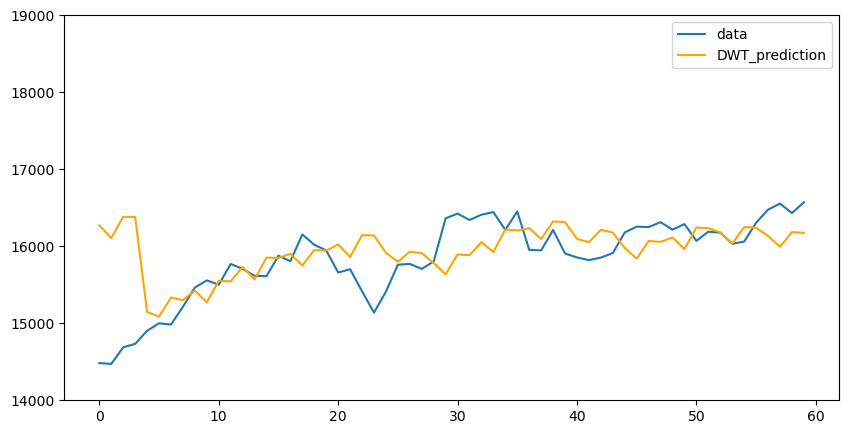

In [256]:
plt.figure(figsize=(10 ,5))
# plt.ylim([13500,20000])
# plt.xlim([1,200])
plt.ylim([14000,19000])
plt.plot(concat_df_few_data['Close_^TWII'][:120].to_list())
# plt.plot(updated_original_s[:120],c='violet')
plt.plot(updated_original[:120],c='orange')
plt.legend(['data', 'DWT_prediction'], loc='upper right')

plt.show()

In [228]:
concat_df_1 = concat_true_and_predict_value(start_day_1,end_day_1,predict_list)
len(concat_df_1)

364
364
            Close_^TWII       predict
Date                                 
2020-12-28   14483.0703  16272.019531
2020-12-29   14472.0498  16103.363281
2020-12-30   14687.7002  16386.644531
2020-12-31   14732.5302  16379.647461
2021-01-04   14902.0302  15148.742188
2021-01-05   15000.0302  15082.238281
2021-01-06   14983.1298  15336.924805
2021-01-07   15214.0000  15300.161133
2021-01-08   15463.9502  15425.689453
2021-01-11   15557.2998  15267.558594
2021-01-12   15500.7002  15555.172852
2021-01-13   15769.9804  15544.364258
2021-01-14   15707.1904  15731.570312
2021-01-15   15616.3896  15565.933594
2021-01-18   15612.0000  15856.607422
2021-01-19   15877.3701  15848.500000
2021-01-20   15806.1796  15901.226562
2021-01-21   16153.7695  15746.248047
2021-01-22   16019.0302  15954.892578
2021-01-25   15946.5400  15942.974609
2021-01-26   15658.8496  16024.662109
2021-01-27   15701.4502  15856.751953
2021-01-28   15415.8798  16147.768555
2021-01-29   15138.3095  16140.497070
2021

364

In [959]:
concat_df_1['updated_original'] = updated_original
concat_df_1['predict'].to_list()

[14175.2138671875,
 14314.3271484375,
 14322.0107421875,
 14461.0087890625,
 14429.3466796875,
 14534.8564453125,
 14546.158203125,
 14587.46875,
 14858.98046875,
 14951.798828125,
 14964.96875,
 15006.455078125,
 15426.455078125,
 15521.99609375,
 15531.6318359375,
 15575.2431640625,
 15667.0703125,
 15761.625,
 15808.978515625,
 15848.669921875,
 15992.0634765625,
 16081.0869140625,
 16067.3330078125,
 16107.2548828125,
 15654.953125,
 15655.35546875,
 15782.23828125,
 15790.30859375,
 15497.2041015625,
 15551.4892578125,
 15578.37890625,
 15606.52734375,
 16007.814453125,
 16067.26953125,
 16223.564453125,
 16247.046875,
 16251.7236328125,
 16268.2802734375,
 16568.837890625,
 16577.677734375,
 16028.4609375,
 16027.58984375,
 16341.8837890625,
 16341.5517578125,
 15763.94921875,
 15734.201171875,
 16048.619140625,
 16046.970703125,
 16060.69140625,
 16025.169921875,
 16312.3994140625,
 16309.4111328125,
 16109.9814453125,
 16056.4248046875,
 16413.767578125,
 16404.892578125,
 1598

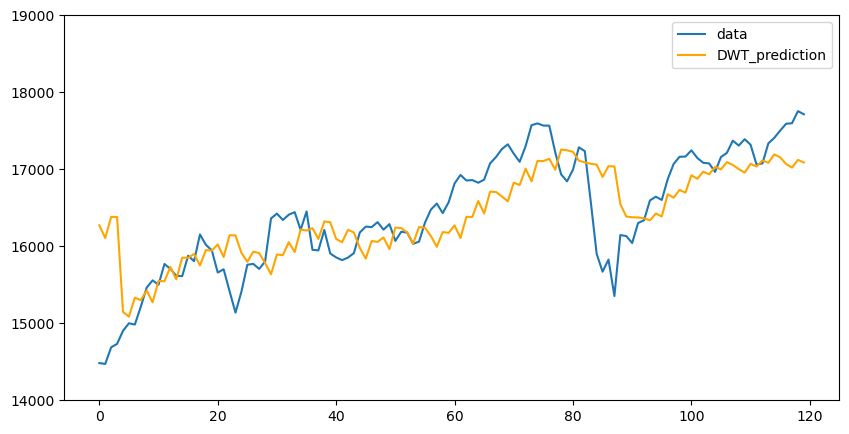

LSTM_R2= 0.5397983914718758
LSTM_MSE= 274807.1126147775
LSTM_MAE= 376.6220991145834
LSTM_RMSE= 524.2204809188378
LSTM_MRE= 2.330365992438647


In [231]:
thr = 3.4343

thres2 = pywt.threshold(coeff_2_predict, thr, 'soft')
thres3 = pywt.threshold(coeff_3_predict, thr, 'soft')

final_result = []
final_result.append(np.array(coeff_1_predict).ravel())
final_result.append(np.array(thres2).ravel())
final_result.append(np.array(thres3).ravel())
updated_original = pywt.waverec(final_result, wavelet)

plt.figure(figsize=(10 ,5))
plt.ylim([14000,19000])
plt.plot(concat_df_1['Close_^TWII'][:120].to_list())
# plt.plot(updated_original_s[:120],c='violet')
plt.plot(updated_original[:120],c='orange')
plt.legend(['data', 'DWT_prediction','DWT_prediction(incremental)'], loc='upper right')
plt.show()

k = concat_df_1['Close_^TWII'][:120].tolist()
r = updated_original[:120]

LSTM_R2 = r2_score(concat_df_1['Close_^TWII'][:120],updated_original[:120])
LSTM_MSE = mean_squared_error(concat_df_1['Close_^TWII'][:120],updated_original[:120])
LSTM_MAE = mean_absolute_error(concat_df_1['Close_^TWII'][:120],updated_original[:120])
LSTM_MRE = np.mean(np.abs((k - r) / k)) * 100
print("LSTM_R2=",LSTM_R2)
print("LSTM_MSE=",LSTM_MSE)
print("LSTM_MAE=",LSTM_MAE)
print("LSTM_RMSE=",sqrt(LSTM_MSE))
print("LSTM_MRE=",LSTM_MRE)

# 訊號重建觀察

In [12]:
train_begin_t = '2021-01-01'
# train_begin_date
train_end_t = '2023-01-01'
# end_day_1
train_dataframe_Close_t = yf.download('^TWII',start=train_begin_t,end=train_end_t)
train_dataframe_Close_t = train_dataframe_Close_t['Close']
train_dataframe_Close_t = pd.DataFrame(train_dataframe_Close_t)
train_dataframe_Close_t

[*********************100%***********************]  1 of 1 completed


Close
Date                    
2021-01-04  14902.030273
2021-01-05  15000.030273
2021-01-06  14983.129883
2021-01-07  15214.000000
2021-01-08  15463.950195
2021-01-11  15557.299805
2021-01-12  15500.700195
2021-01-13  15769.980469
2021-01-14  15707.190430
2021-01-15  15616.389648
2021-01-18  15612.000000
2021-01-19  15877.370117
2021-01-20  15806.179688
2021-01-21  16153.769531
2021-01-22  16019.030273
2021-01-25  15946.540039
2021-01-26  15658.849609
2021-01-27  15701.450195
2021-01-28  15415.879883
2021-01-29  15138.309570
2021-02-01  15410.089844
2021-02-02  15760.049805
2021-02-03  15771.320312
2021-02-04  15706.219727
2021-02-05  15802.400391
2021-02-17  16362.290039
2021-02-18  16424.509766
2021-02-19  16341.379883
2021-02-22  16410.160156
2021-02-23  16443.400391
2021-02-24  16212.530273
2021-02-25  16452.179688
2021-02-26  15953.799805
2021-03-02  15946.879883
2021-03-03  16211.730469
2021-03-04  15906.410156
2021-03-05  15855.230469
2021-03-08  15820.110352
2021-03-09  15853.089844
2021-03-10  15911.669922
2021-03-11  16179.559570
2021-03-12  16255.179688
2021-03-15  16249.330078
2021-03-16  16313.160156
2021-03-17  16215.820312
2021-03-18  16287.839844
2021-03-19  16070.240234
2021-03-22  16189.219727
2021-03-23  16177.589844
2021-03-24  16032.120117
2021-03-25  16060.139648
2021-03-26  16305.879883
2021-03-29  16475.970703
2021-03-30  16554.900391
2021-03-31  16431.130859
2021-04-01  16571.279297
2021-04-07  16815.359375
2021-04-08  16926.439453
2021-04-09  16854.099609
2021-04-12  16859.699219
2021-04-13  16824.910156
2021-04-14  16865.970703
2021-04-15  17076.730469
2021-04-16  17158.810547
2021-04-19  17263.279297
2021-04-20  17323.869141
2021-04-21  17202.109375
2021-04-22  17096.970703
2021-04-23  17300.269531
2021-04-26  17572.289062
2021-04-27  17595.900391
2021-04-28  17567.529297
2021-04-29  17566.660156
2021-05-03  17222.349609
2021-05-04  16933.779297
2021-05-05  16843.439453
2021-05-06  16994.359375
2021-05-07  17285.000000
2021-05-10  17235.609375
2021-05-11  16583.130859
2021-05-12  15902.370117
2021-05-13  15670.099609
2021-05-14  15827.089844
2021-05-17  15353.889648
2021-05-18  16145.980469
2021-05-19  16132.660156
2021-05-20  16042.360352
2021-05-21  16302.059570
2021-05-24  16338.290039
2021-05-25  16595.669922
2021-05-26  16643.689453
2021-05-27  16601.609375
2021-05-28  16870.859375
2021-05-31  17068.429688
2021-06-01  17162.380859
2021-06-02  17165.039062
2021-06-03  17246.160156
2021-06-04  17147.410156
2021-06-07  17083.910156
2021-06-08  17076.210938
2021-06-09  16966.220703
2021-06-10  17159.220703
2021-06-11  17213.519531
2021-06-15  17371.289062
2021-06-16  17307.859375
2021-06-17  17390.609375
2021-06-18  17318.539062
2021-06-21  17062.980469
2021-06-22  17075.550781
2021-06-23  17336.710938
2021-06-24  17407.960938
2021-06-25  17502.990234
2021-06-28  17590.970703
2021-06-29  17598.189453
2021-06-30  17755.460938
2021-07-01  17713.939453
2021-07-02  17710.150391
2021-07-05  17919.330078
2021-07-06  17913.070312
2021-07-07  17850.689453
2021-07-08  17866.089844
2021-07-09  17661.480469
2021-07-12  17814.330078
2021-07-13  17847.519531
2021-07-14  17845.750000
2021-07-15  18034.189453
2021-07-16  17895.250000
2021-07-19  17789.250000
2021-07-20  17528.740234
2021-07-21  17458.789062
2021-07-22  17572.330078
2021-07-23  17572.919922
2021-07-26  17403.560547
2021-07-27  17269.869141
2021-07-28  17135.220703
2021-07-29  17402.810547
2021-07-30  17247.410156
2021-08-02  17503.279297
2021-08-03  17553.759766
2021-08-04  17623.890625
2021-08-05  17603.119141
2021-08-06  17526.279297
2021-08-09  17485.150391
2021-08-10  17323.640625
2021-08-11  17227.179688
2021-08-12  17219.939453
2021-08-13  16982.109375
2021-08-16  16858.769531
2021-08-17  16661.359375
2021-08-18  16826.269531
2021-08-19  16375.400391
2021-08-20  16341.940430
2021-08-23  16741.839844
2021-08-24  16818.730469
2021-08-25  17045.859375
2021-08-26  17066.960938
2021-08-27  17209.929688
2021-08-30  17396.519531
2021-08-31  17490.2

In [13]:
# 訓練集的小波轉換
train_rec = train_dataframe_Close_t['Close']

train_coefficientrec = pywt.wavedec(train_rec, wavelet, level = 2)
# max_level_train = pywt.swt_max_level(len(train))
# train_coefficients = pywt.swt(train, 'db10', level=3)
len(train_coefficientrec[0])

123

In [14]:
result_3_zero = []
for i in range(2*len(coeff_3_predict)):
    result_3_zero.append([0])
result_3_zero = np.array(result_3_zero)
result_2_zero = []
for i in range(len(coeff_2_predict)):
    result_2_zero.append([0])
result_2_zero = np.array(result_2_zero)
print(len(coeff_2_predict))

thr = 3.4343

thres2 = pywt.threshold(coeff_2_predict, thr, 'soft')
thres3 = pywt.threshold(coeff_3_predict, thr, 'soft')

final_result = []
final_result.append(np.array(coeff_1_predict).ravel())
final_result.append(np.array(thres2).ravel())
final_result.append(np.array(thres3).ravel())


NameError: name 'coeff_3_predict' is not defined

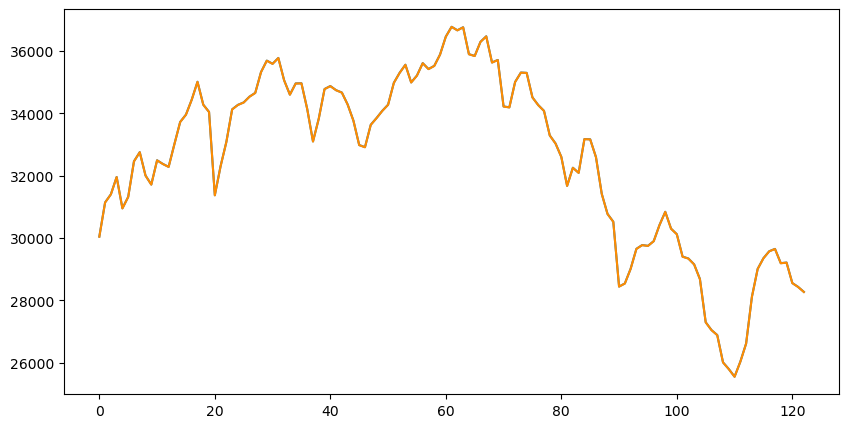

In [16]:
thr = 3.4343
train_coefficientrec_1 = pywt.threshold(train_coefficientrec[0], thr, 'soft',substitute=0)

plt.figure(figsize=(10 ,5))
plt.plot(train_coefficientrec[0])
plt.plot(train_coefficientrec_1.tolist(),c='darkorange')

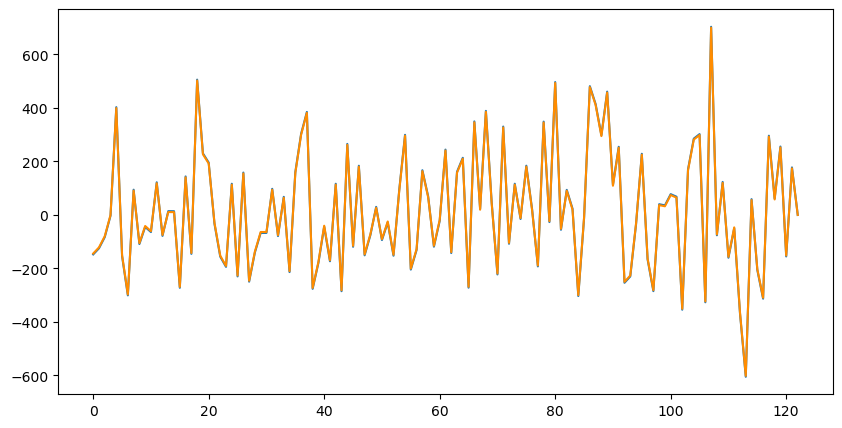

In [17]:
thr = 3.4343
train_coefficientrec_2 = pywt.threshold(train_coefficientrec[1], thr, 'soft',substitute=0)

plt.figure(figsize=(10 ,5))
# plt.xlim([20,25])
plt.plot(train_coefficientrec[1])
plt.plot(train_coefficientrec_2.tolist(),c='darkorange')
# plt.plot(test_coefficients[1])

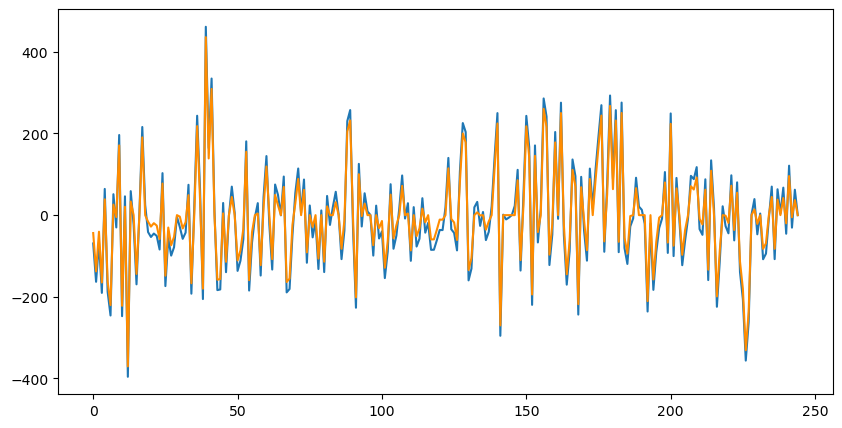

In [25]:
thr = 25.4343
train_coefficientrec_3 = pywt.threshold(train_coefficientrec[2], thr, 'soft',substitute=0)

plt.figure(figsize=(10 ,5))
plt.plot(train_coefficientrec[2])
# plt.xlim([20,23])
plt.plot(train_coefficientrec_3.tolist(),c='darkorange')

In [195]:
final_result_denoise = []
final_result_denoise.append(np.array(train_coefficientrec_1.tolist()).ravel())
final_result_denoise.append(np.array(train_coefficientrec_2.tolist()).ravel())
final_result_denoise.append(np.array(train_coefficientrec_3.tolist()).ravel())
denoise_result = pywt.waverec(final_result_denoise, wavelet)

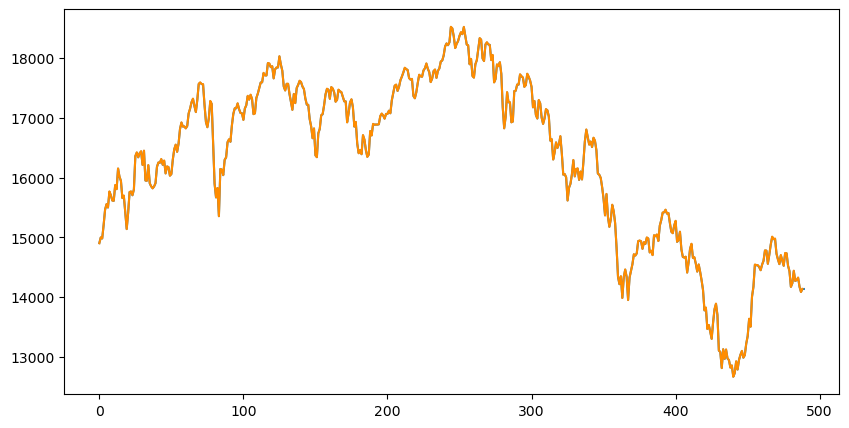

In [196]:
plt.figure(figsize=(10 ,5))
plt.plot(denoise_result)
plt.plot(train_dataframe_Close_t['Close'].tolist(),c='darkorange')